In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize,
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from matplotlib import gridspec
from matplotlib import patches as mpatches

import glob
import numpy as np
import os
import scipy

%load_ext autoreload
%autoreload 2
import sys

sys.path.insert(1, '../code')
import plotter
import utils
from utils import *
import plotter

%matplotlib inline
#sys.path.insert(1, '../../clust')
#import clustering_statistics as cs

In [2]:
statistics = ['wp', 'xi', 'xi2', 'upf', 'mcf']
stat_strs_single = np.loadtxt('../tables/statistic_sets_single.txt', dtype=str)
stat_strs_addin = np.loadtxt('../tables/statistic_sets_addin.txt', dtype=str)
stat_strs_addin_full = np.concatenate((['wp'], stat_strs_addin))
stat_strs_scale = np.concatenate((stat_strs_single, 
                                 ['xi_xi2', 'wp_xi_xi2', 'wp_xi_xi2_mcf', 'wp_xi_xi2_upf_mcf']))

params_keydeliverable = ['Omega_m', 'sigma_8', 'f', 'fsigma8']
params_keycosmo = ['Omega_m', 'sigma_8', 'f']
params_keyhodab = ['M_sat', 'v_bs', 'f_env']
params_keymix = ['Omega_m', 'sigma_8', 'f', 'M_sat', 'v_bs', 'f_env']

id_pairs_test = np.loadtxt('../tables/id_pairs_recovery_test_70.txt', delimiter=',', dtype=np.int)

labels_single = [
                 make_label('wp'),
                 make_label('xi'),
                 make_label('xi2'),
                 make_label('upf'),
                 make_label('mcf')
                ]
labels_addin = [
                 make_label('wp'),
                 '+'+make_label('xi'),
                 '+'+make_label('xi2'),
                 '+'+make_label('upf'),
                 '+'+make_label('mcf'),
                ]
labels_addin_full = [
                 make_label('wp'),
                 make_label(['wp', 'xi']),
                 make_label(['wp', 'xi', 'xi2']),
                 make_label(['wp', 'xi', 'xi2', 'upf']),
                 make_label(['wp', 'xi', 'xi2', 'upf', 'mcf'])
                ]
labels_scale = np.concatenate((labels_single, 
                               [make_label(['xi', 'xi2']),
                                make_label(['wp', 'xi', 'xi2']),
                                make_label(['wp', 'xi', 'xi2', 'mcf']),
                                make_label(['wp', 'xi', 'xi2', 'upf', 'mcf'])]))


colors_single = ['#73B9F3', '#2B66CE', '#31D8BF', '#FFB142', '#F97FF0']
colors_addin = ['#73B9F3', '#8973F5', '#952DAD', '#D81471', '#B70D0D']
colors_scale = np.concatenate((colors_single, 
                               ['navy', colors_addin[2], '#ff33b4', colors_addin[-1]]))
colors_cov = ['#7B767B', colors_addin[-1]]

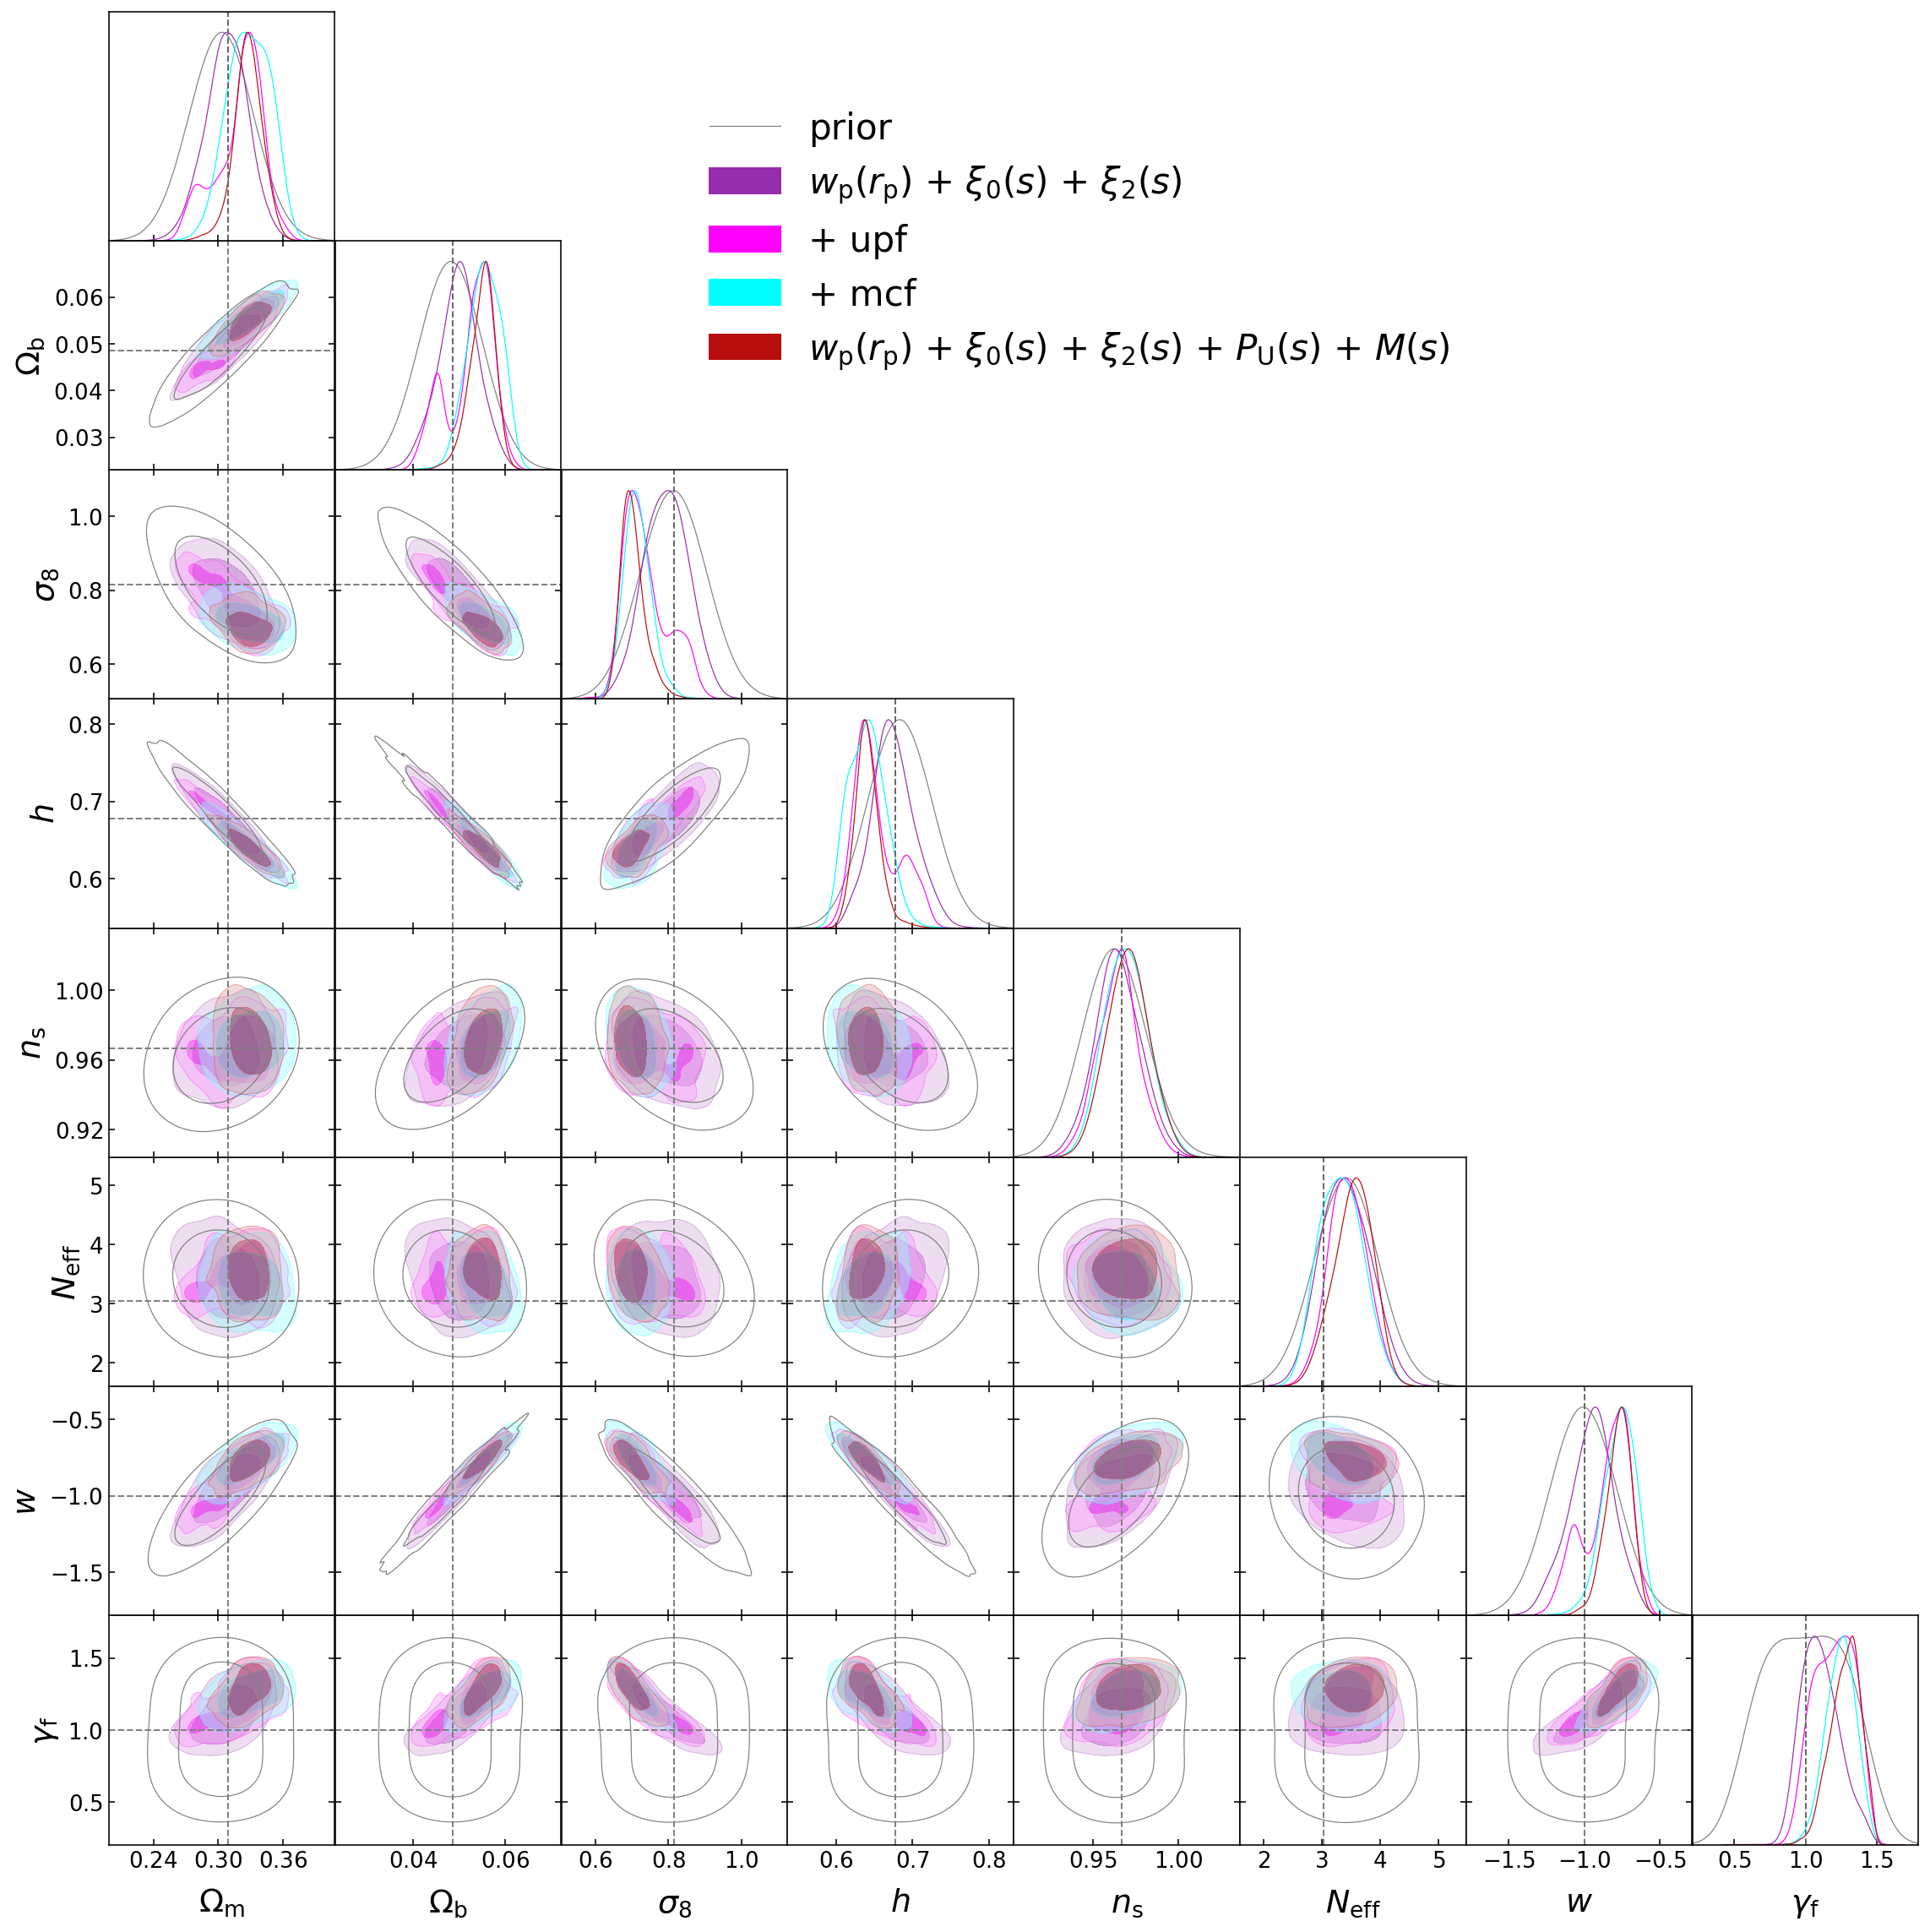

In [3]:
%matplotlib inline
chaintags = [
             'wp_xi_xi2_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_allmaxscale6',
             'wp_xi_xi2_upf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_allmaxscale6',
             'wp_xi_xi2_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_allmaxscale6',
             'wp_xi_xi2_upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_allmaxscale6',
            ]
#colors = [colors_addin[2]]
#labels = [labels_addin_full[2]]
colors = [colors_addin[2], 'magenta', 'cyan', colors_addin[4]]
labels = [labels_addin_full[2], 
          '+ upf',
          '+ mcf',
          labels_addin_full[4]
         ]
g = plotter.plot_contours(chaintags, colors=colors,
                          legend_labels=labels, legend_loc=(0.36, 0.8),
                          legend_fontsize=24,
                          params_toplot=cosmo_withf_param_names,
                          chaintag_prior='prior')

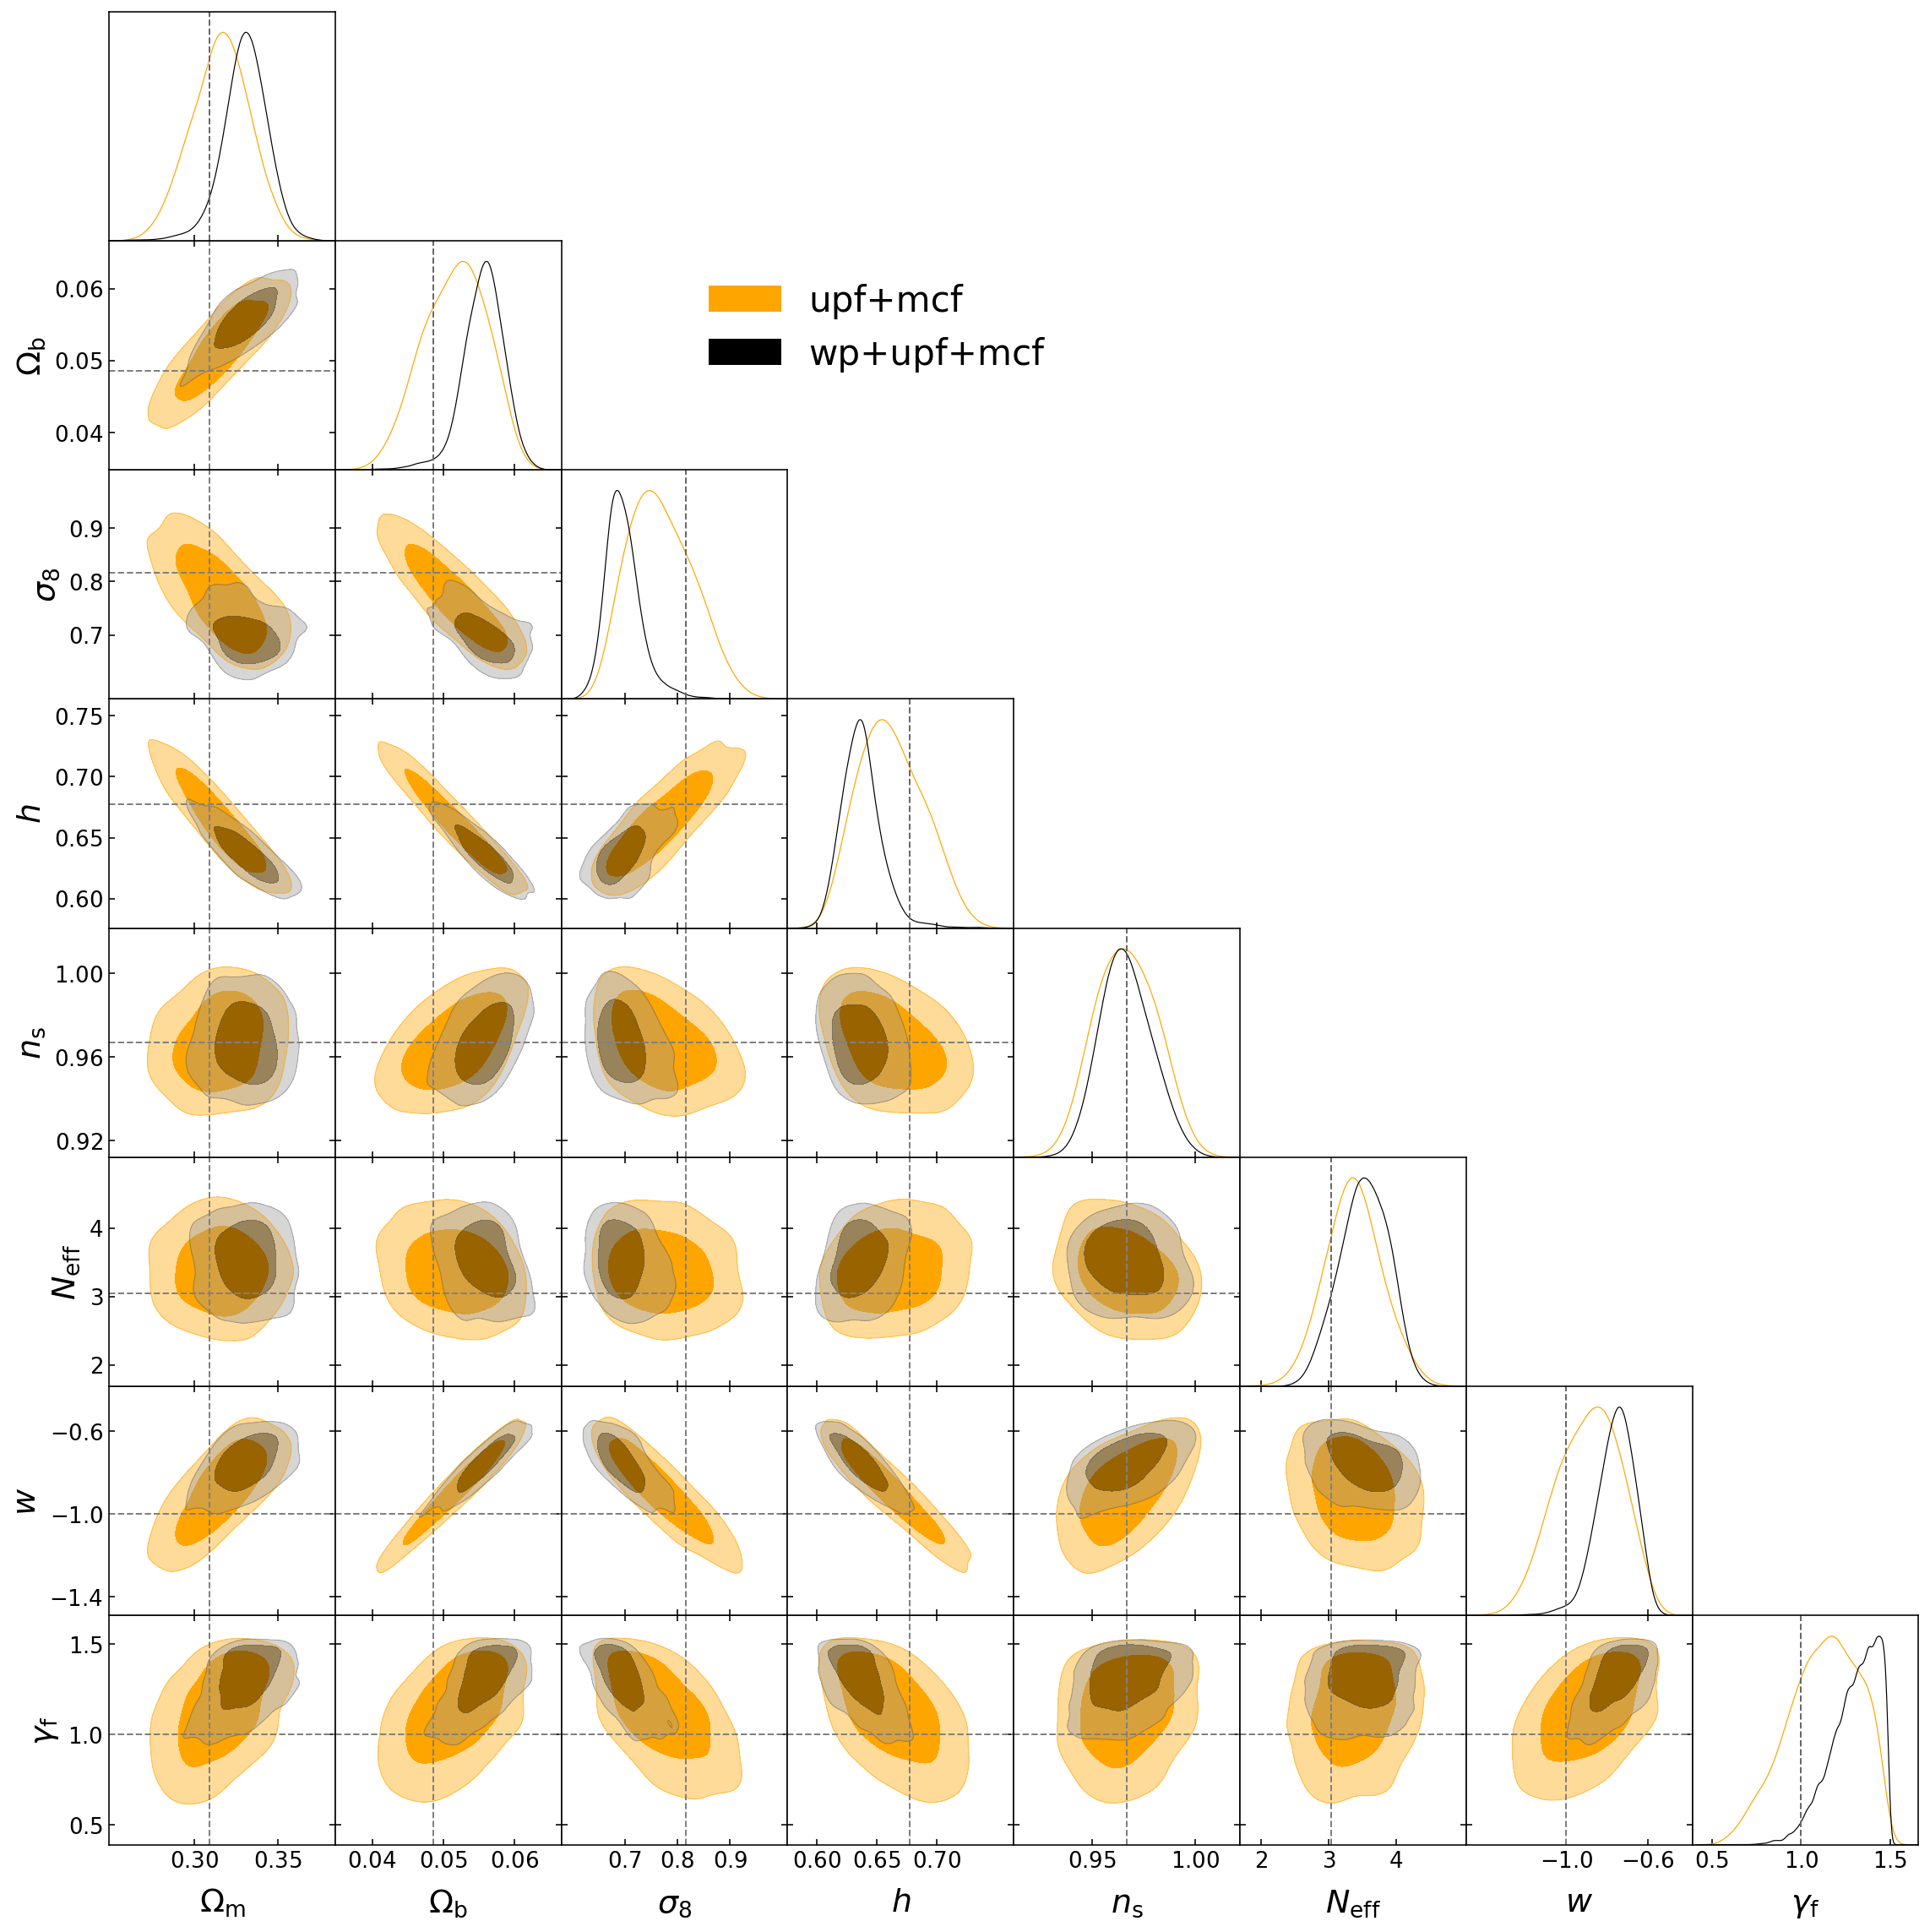

In [4]:
%matplotlib inline
chaintags = [
             'upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_allmaxscale6',
             'wp_upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_allmaxscale6',
            ]
#colors = [colors_addin[2]]
#labels = [labels_addin_full[2]]
colors = ['orange', 'black']
labels = ['upf+mcf',
          'wp+upf+mcf',
         ]
g = plotter.plot_contours(chaintags, colors=colors,
                          legend_labels=labels, legend_loc=(0.36, 0.8),
                          legend_fontsize=24,
                          params_toplot=cosmo_withf_param_names)

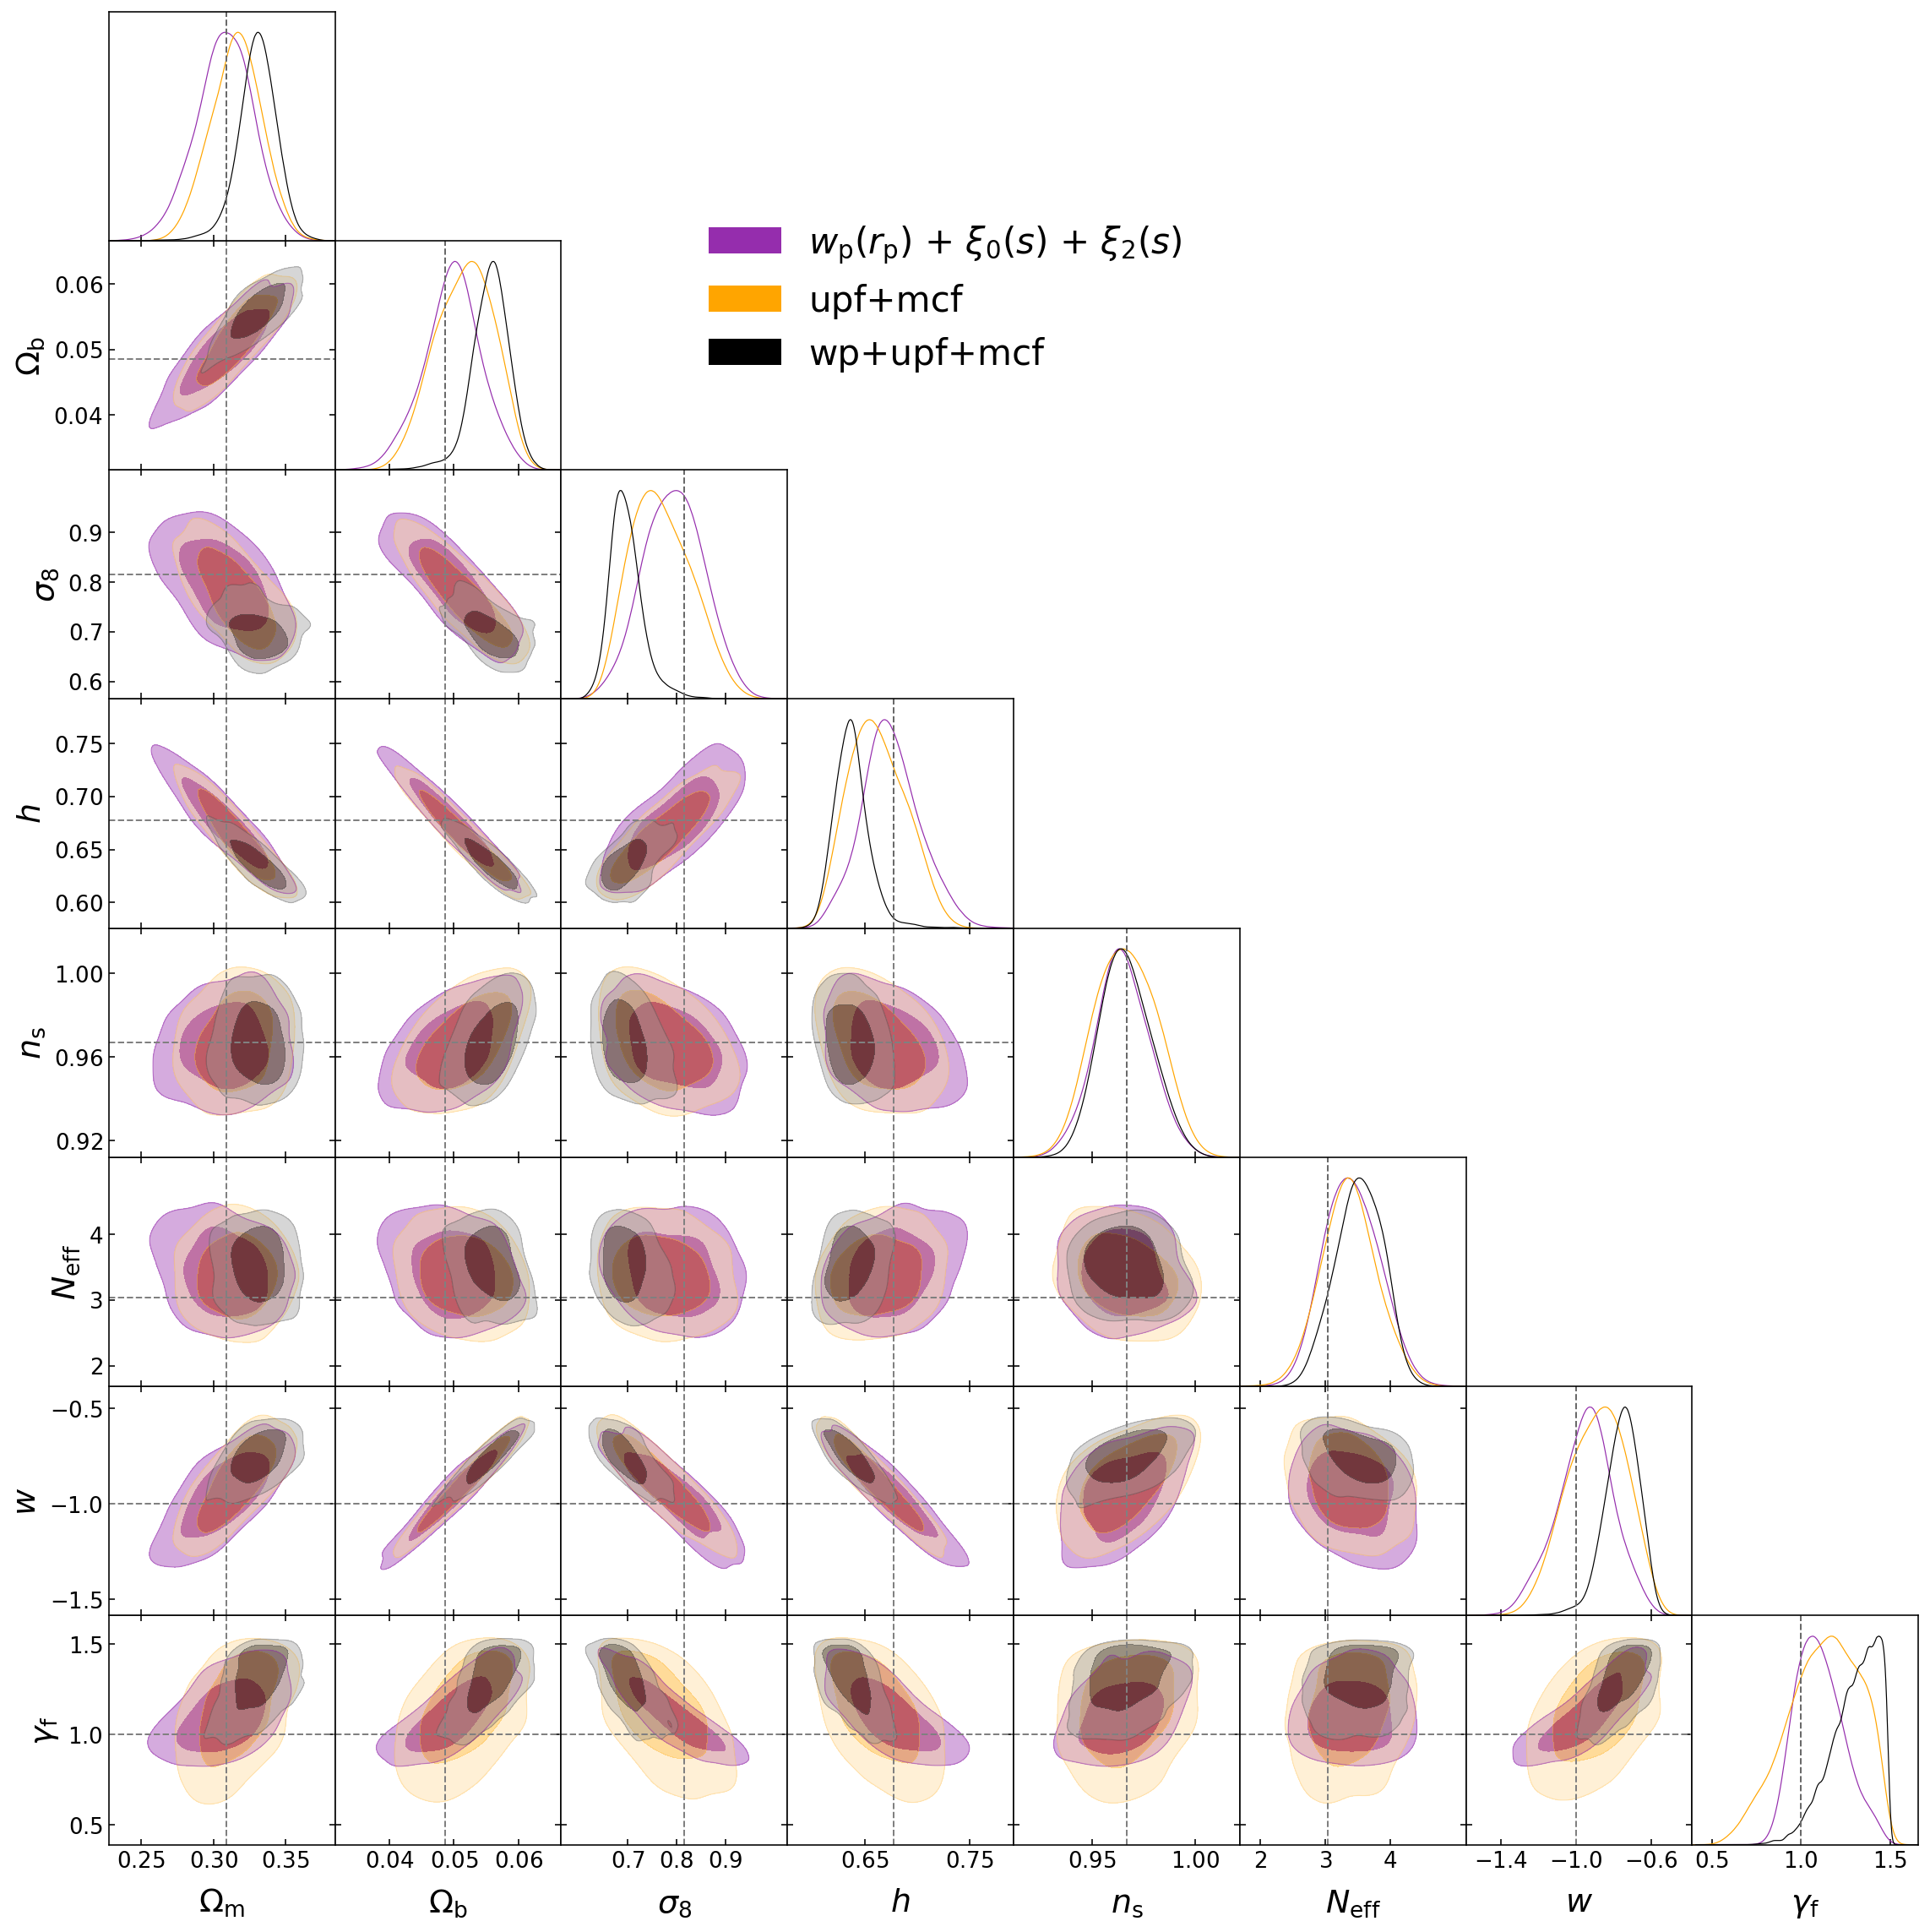

In [13]:
%matplotlib inline
chaintags = [
             'wp_xi_xi2_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_allmaxscale6',
             'upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_allmaxscale6',
             'wp_upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_allmaxscale6',
            ]
#colors = [colors_addin[2]]
#labels = [labels_addin_full[2]]
colors = [colors_addin[2], 'orange', 'black']
labels = [labels_addin_full[2],
          'upf+mcf',
          'wp+upf+mcf',
         ]
g = plotter.plot_contours(chaintags, colors=colors,
                          legend_labels=labels, legend_loc=(0.36, 0.8),
                          legend_fontsize=24,
                          params_toplot=cosmo_withf_param_names)

This means there are no upf actually bc it starts at 5! when tried to include upf along with other onehalo terms, would not converge!

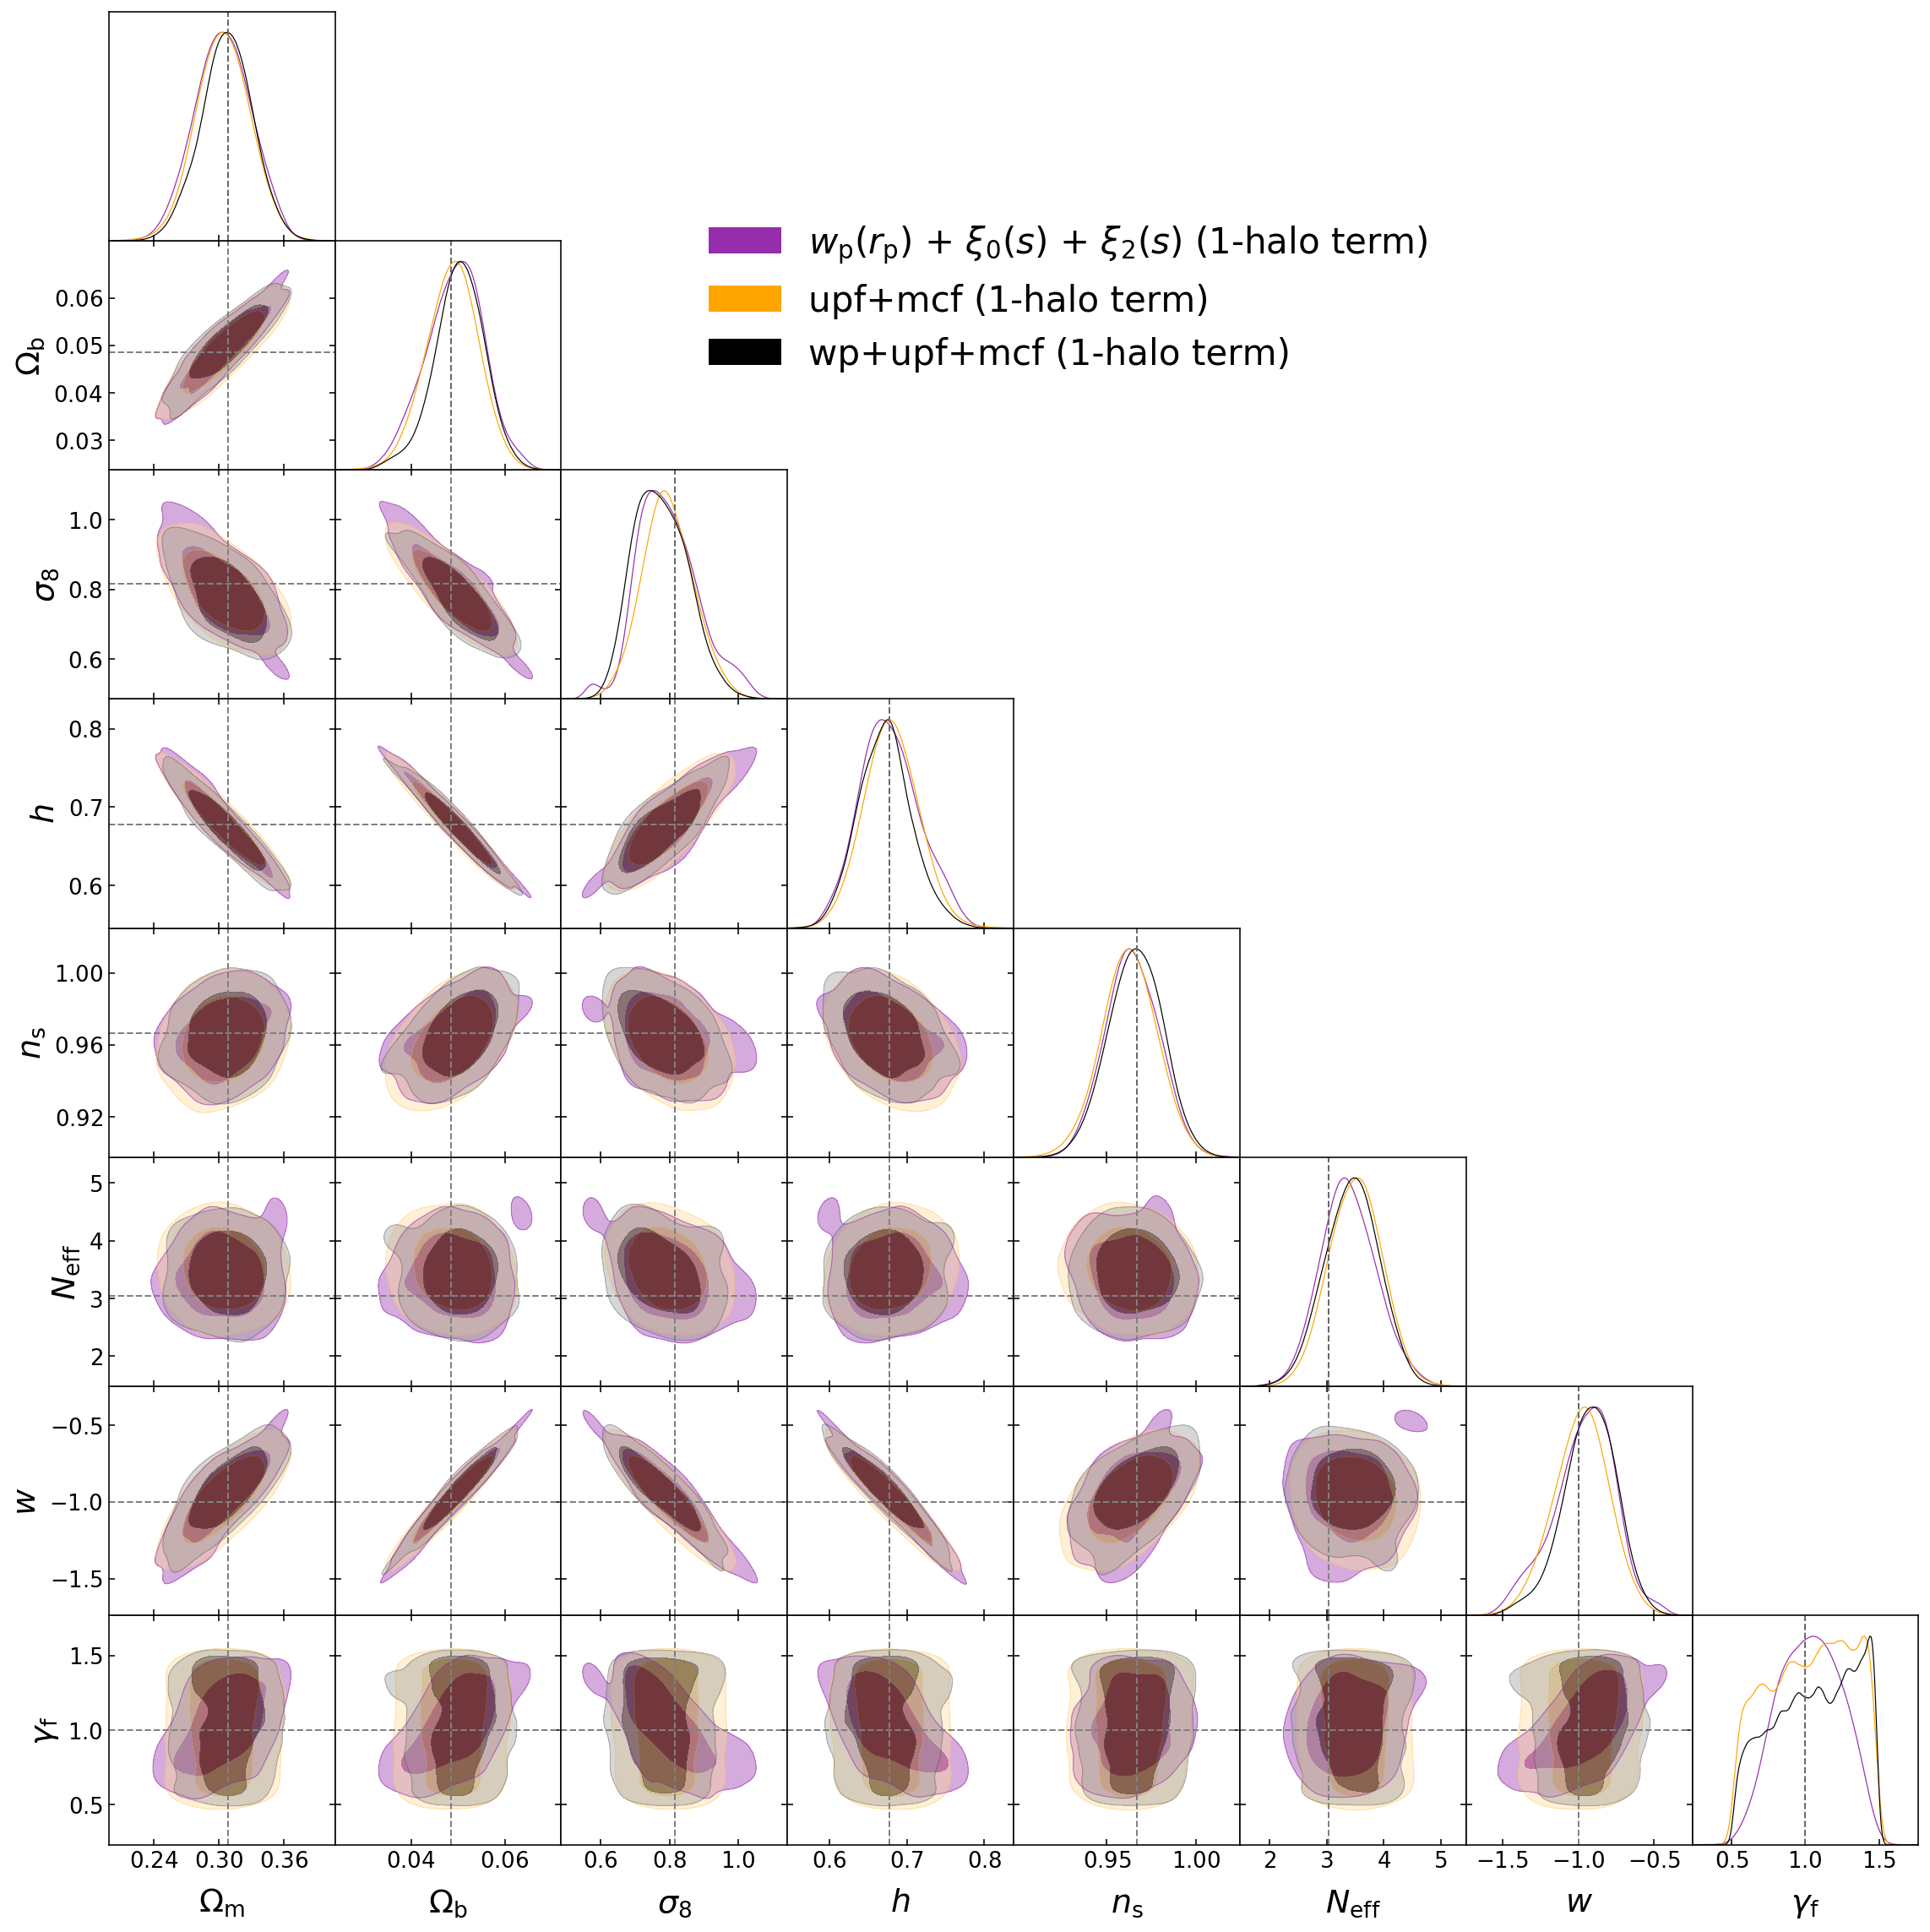

In [16]:
%matplotlib inline
chaintags = [
             'wp_xi_xi2_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_onehalo',
             'upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_onehalo',
             'wp_upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_onehalo',
            ]
#colors = [colors_addin[2]]
#labels = [labels_addin_full[2]]
colors = [colors_addin[2], 'orange', 'black']
extra_label = ' (1-halo term)'
labels = [labels_addin_full[2]+extra_label,
          'upf+mcf'+extra_label,
          'wp+upf+mcf'+extra_label,
         ]
g = plotter.plot_contours(chaintags, colors=colors,
                          legend_labels=labels, legend_loc=(0.36, 0.8),
                          legend_fontsize=24,
                          params_toplot=cosmo_withf_param_names)

Others for twohalo would not converge!!

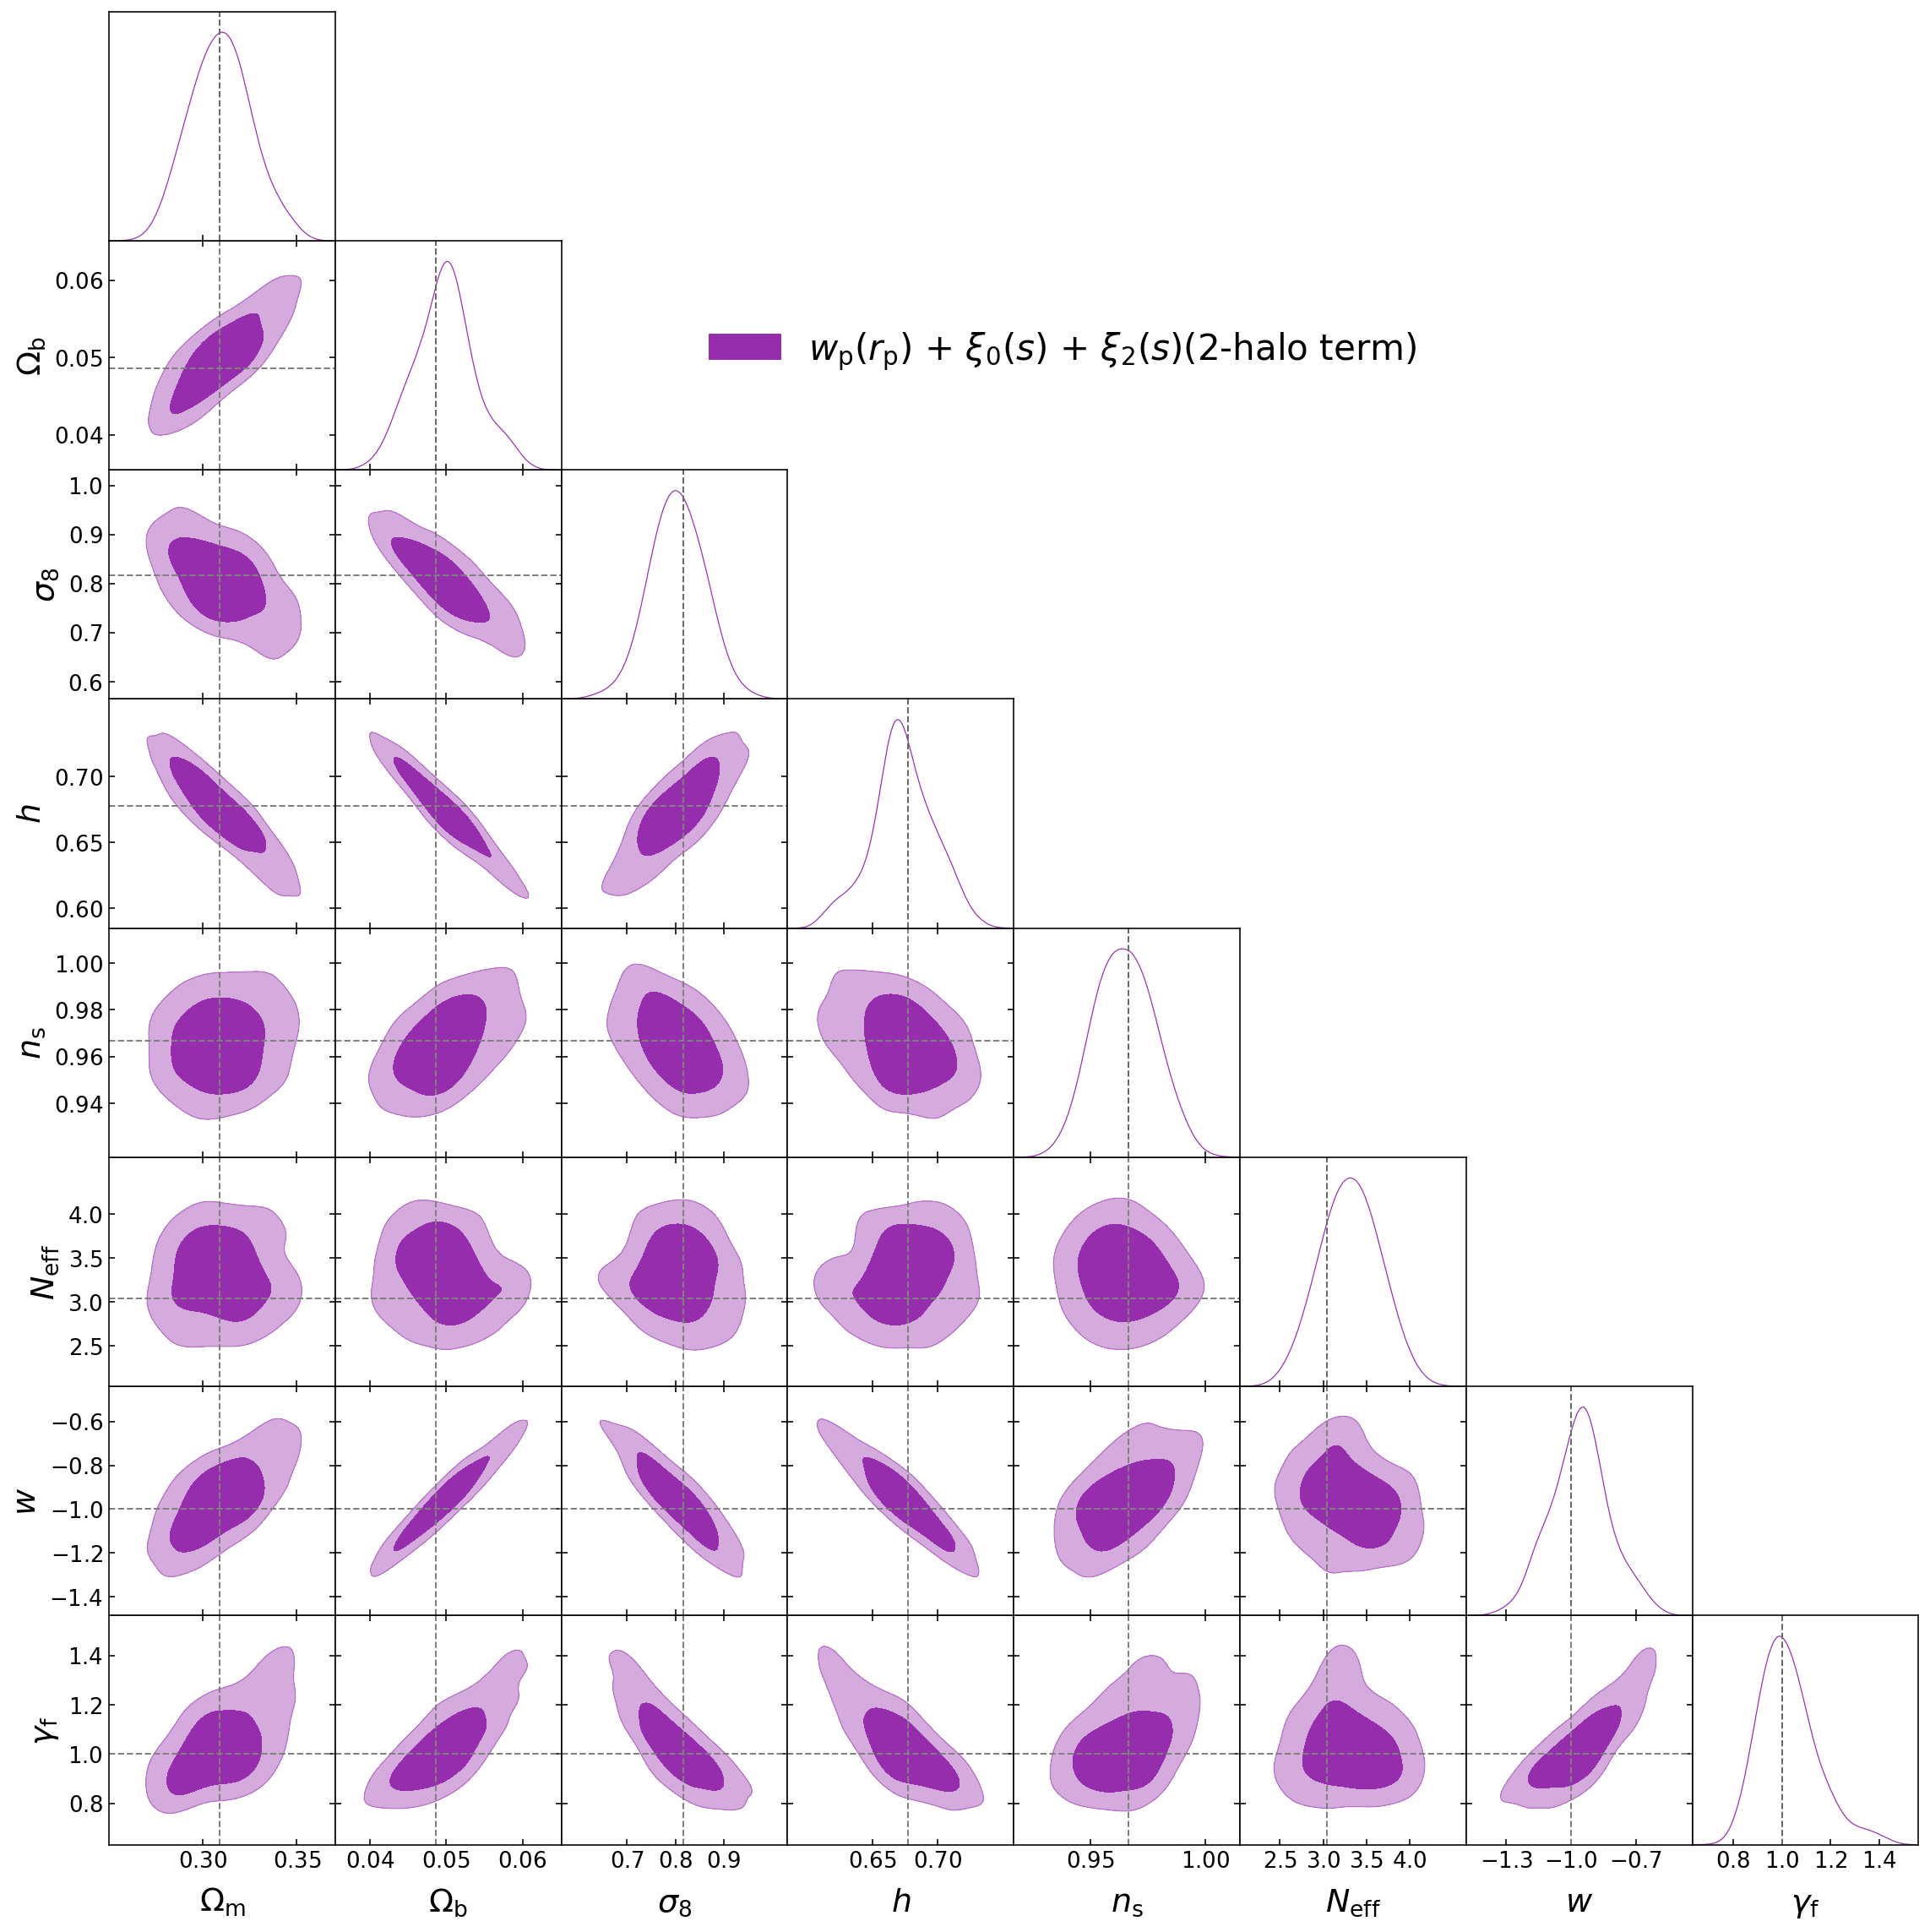

In [17]:
%matplotlib inline
chaintags = [
             'wp_xi_xi2_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_twohalo',
             #'upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_twohalo',
             #'wp_upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_twohalo',
            ]
#colors = [colors_addin[2]]
#labels = [labels_addin_full[2]]
colors = [colors_addin[2], 'orange', 'black']
extra_label = ' (2-halo term)'
labels = [labels_addin_full[2]+extra_label,
          'upf+mcf'+extra_label,
          'wp+upf+mcf'+extra_label,
         ]
g = plotter.plot_contours(chaintags, colors=colors,
                          legend_labels=labels, legend_loc=(0.36, 0.8),
                          legend_fontsize=24,
                          params_toplot=cosmo_withf_param_names)

also tried wp_upf_mcf with wpmaxscale6, not converging! (with allmaxscale6, did converge)

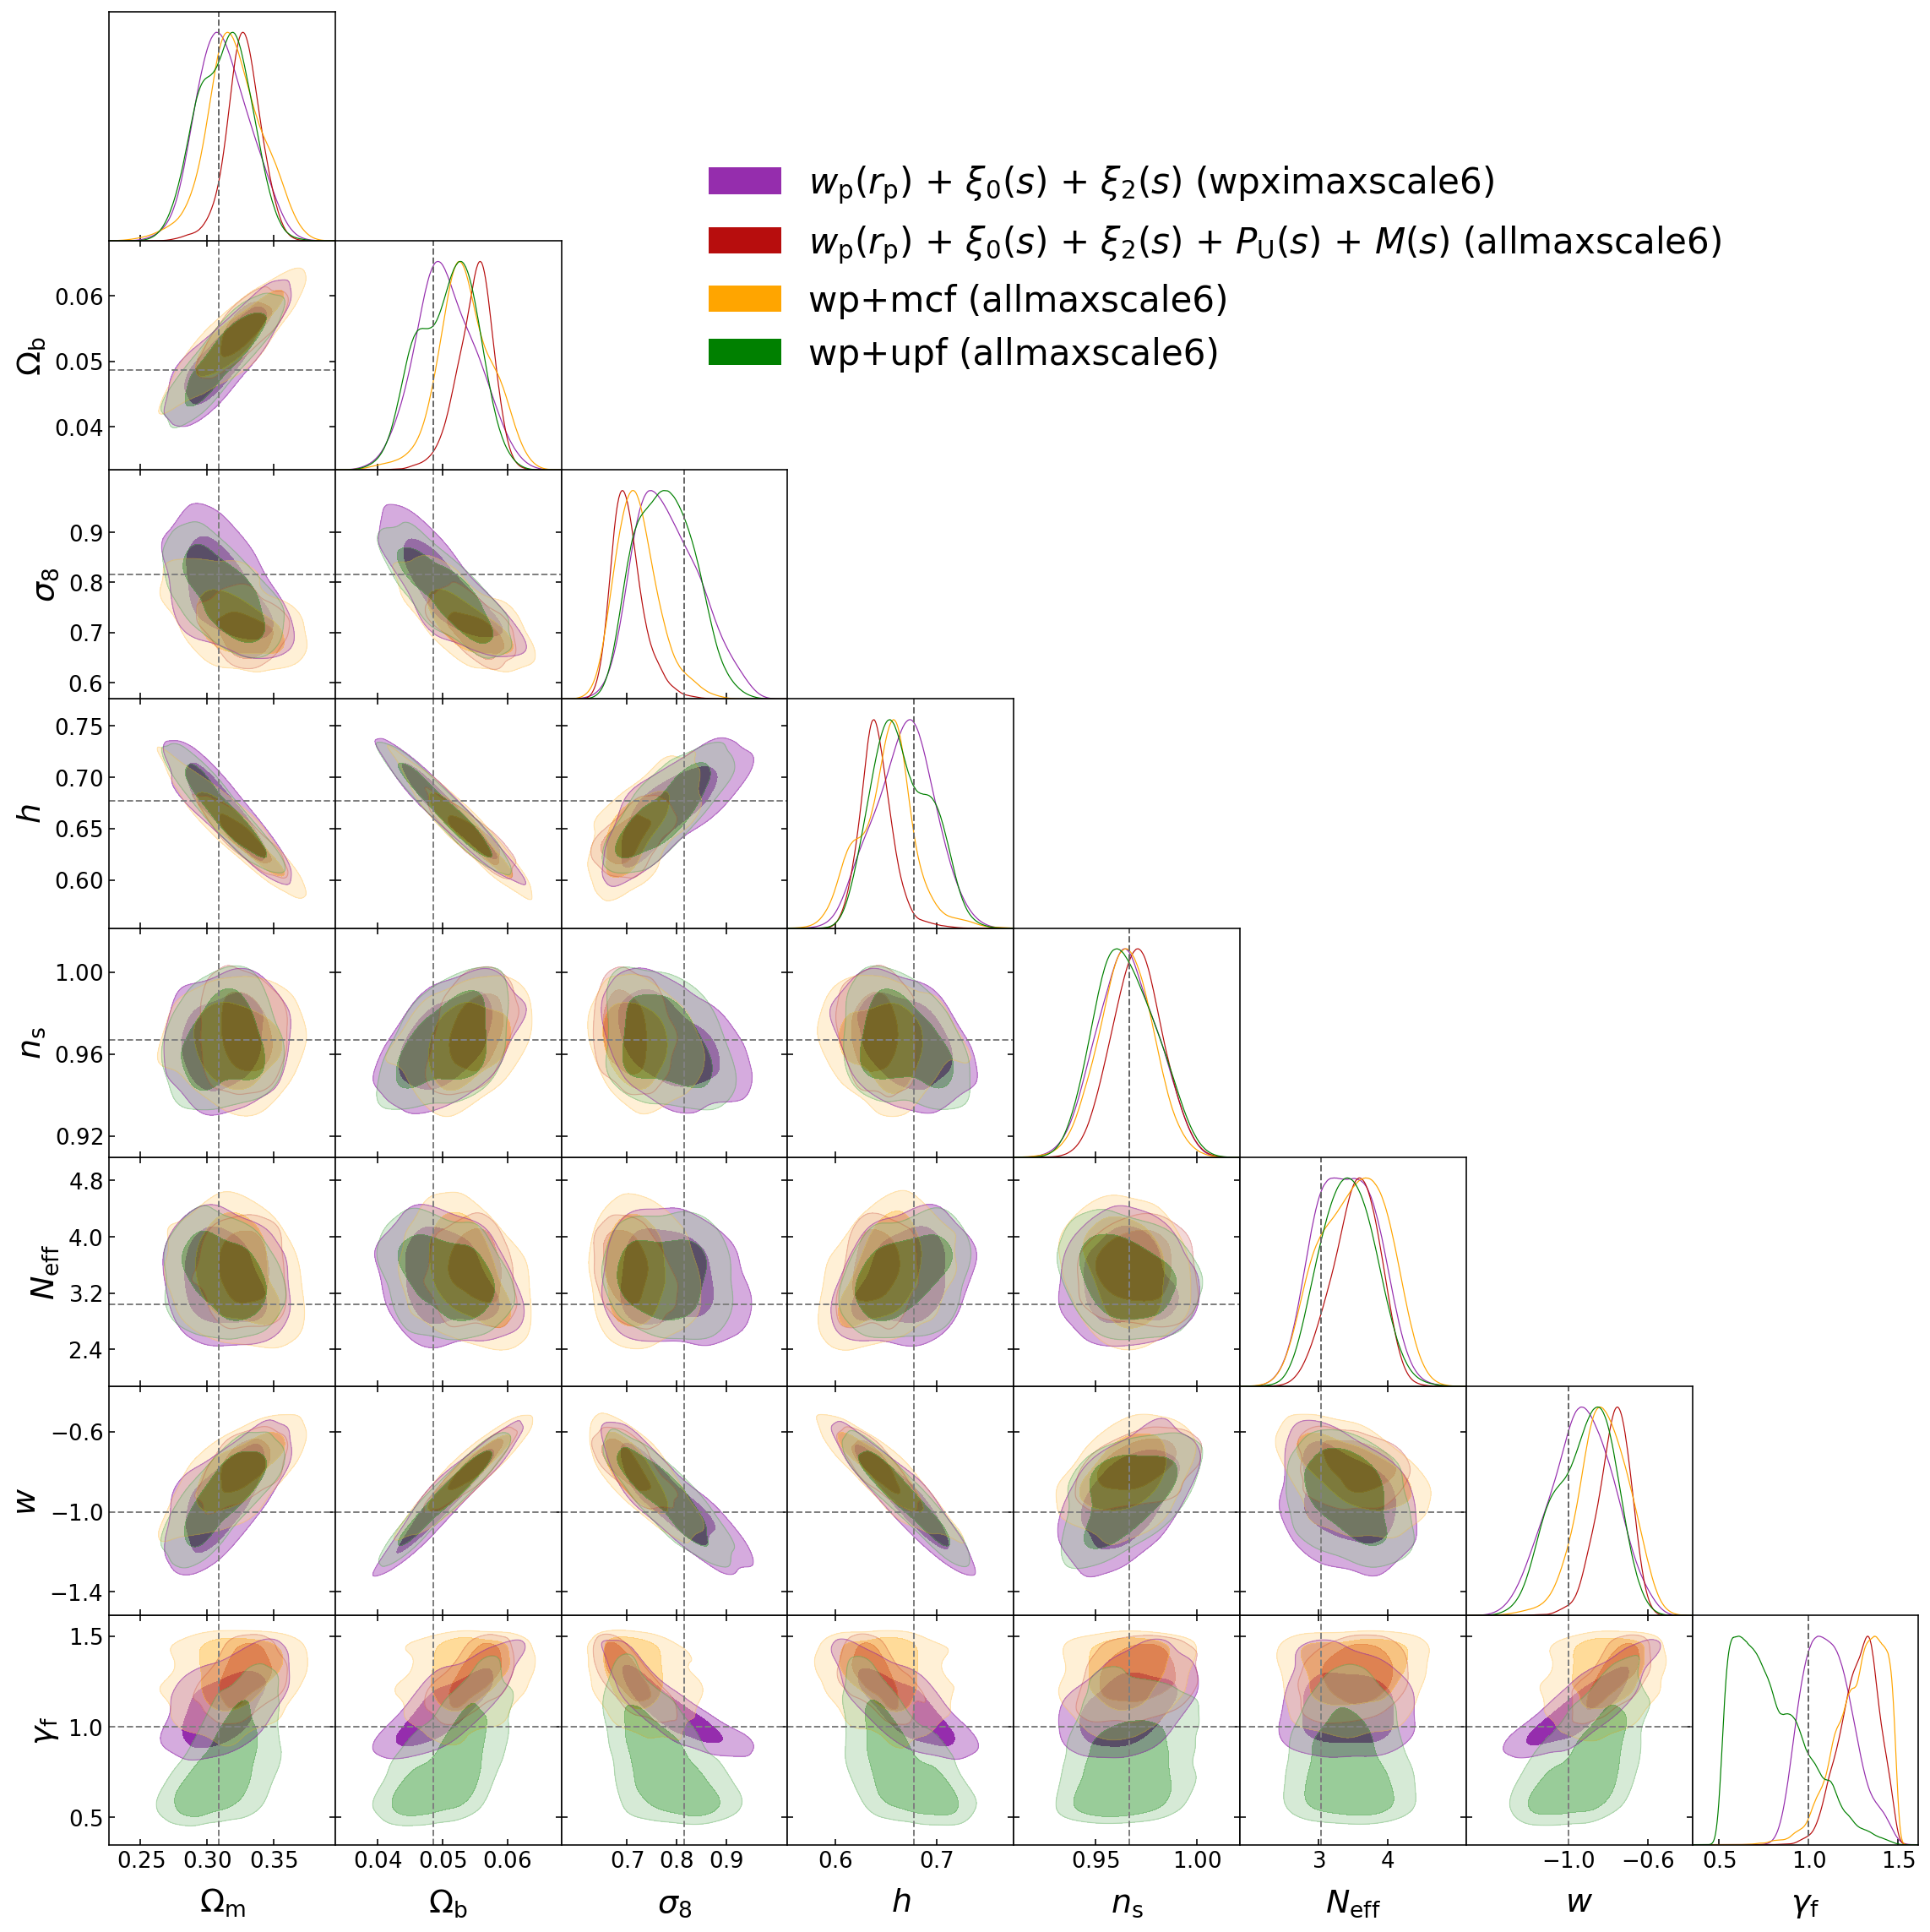

In [80]:
%matplotlib inline
chaintags = [
             'wp_xi_xi2_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_wpximaxscale6',
             'wp_xi_xi2_upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_allmaxscale6',
             'wp_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_allmaxscale6',
             'wp_upf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_allmaxscale6',
             #'mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth',
            ]
#colors = [colors_addin[2]]
#labels = [labels_addin_full[2]]
colors = [colors_addin[2], 
          colors_addin[4], 
          'orange',
          'green',
          ]
labels = [labels_addin_full[2]+' (wpximaxscale6)',
          labels_addin_full[4]+' (allmaxscale6)',
          'wp+mcf (allmaxscale6)',
          'wp+upf (allmaxscale6)',          
         ]
g = plotter.plot_contours(chaintags, colors=colors,
                          legend_labels=labels, legend_loc=(0.36, 0.8),
                          legend_fontsize=24,
                          params_toplot=cosmo_withf_param_names)

In [ ]:
%matplotlib inline
chaintags = [
             'wp_xi_xi2_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_wpximaxscale6',
             'wp_xi_xi2_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth',
             'wp_xi_xi2_upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_allmaxscale6',
             #'wp_xi_xi2_upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_wpximaxscale6',
             'wp_xi_xi2_upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth',
            ]
#colors = [colors_addin[2]]
#labels = [labels_addin_full[2]]
colors = [colors_addin[2],
          'blue',
          colors_addin[4], 
          'magenta',
          ]
labels = [labels_addin_full[2]+' (wpximaxscale6)',
          labels_addin_full[2]+' (all scales)',
          labels_addin_full[4]+' (allmaxscale6)',
          labels_addin_full[4]+' (all scales)',        
         ]
g = plotter.plot_contours(chaintags, colors=colors,
                          legend_labels=labels, legend_loc=(0.36, 0.8),
                          legend_fontsize=24,
                          params_toplot=cosmo_withf_param_names,
                          chaintag_prior='prior')

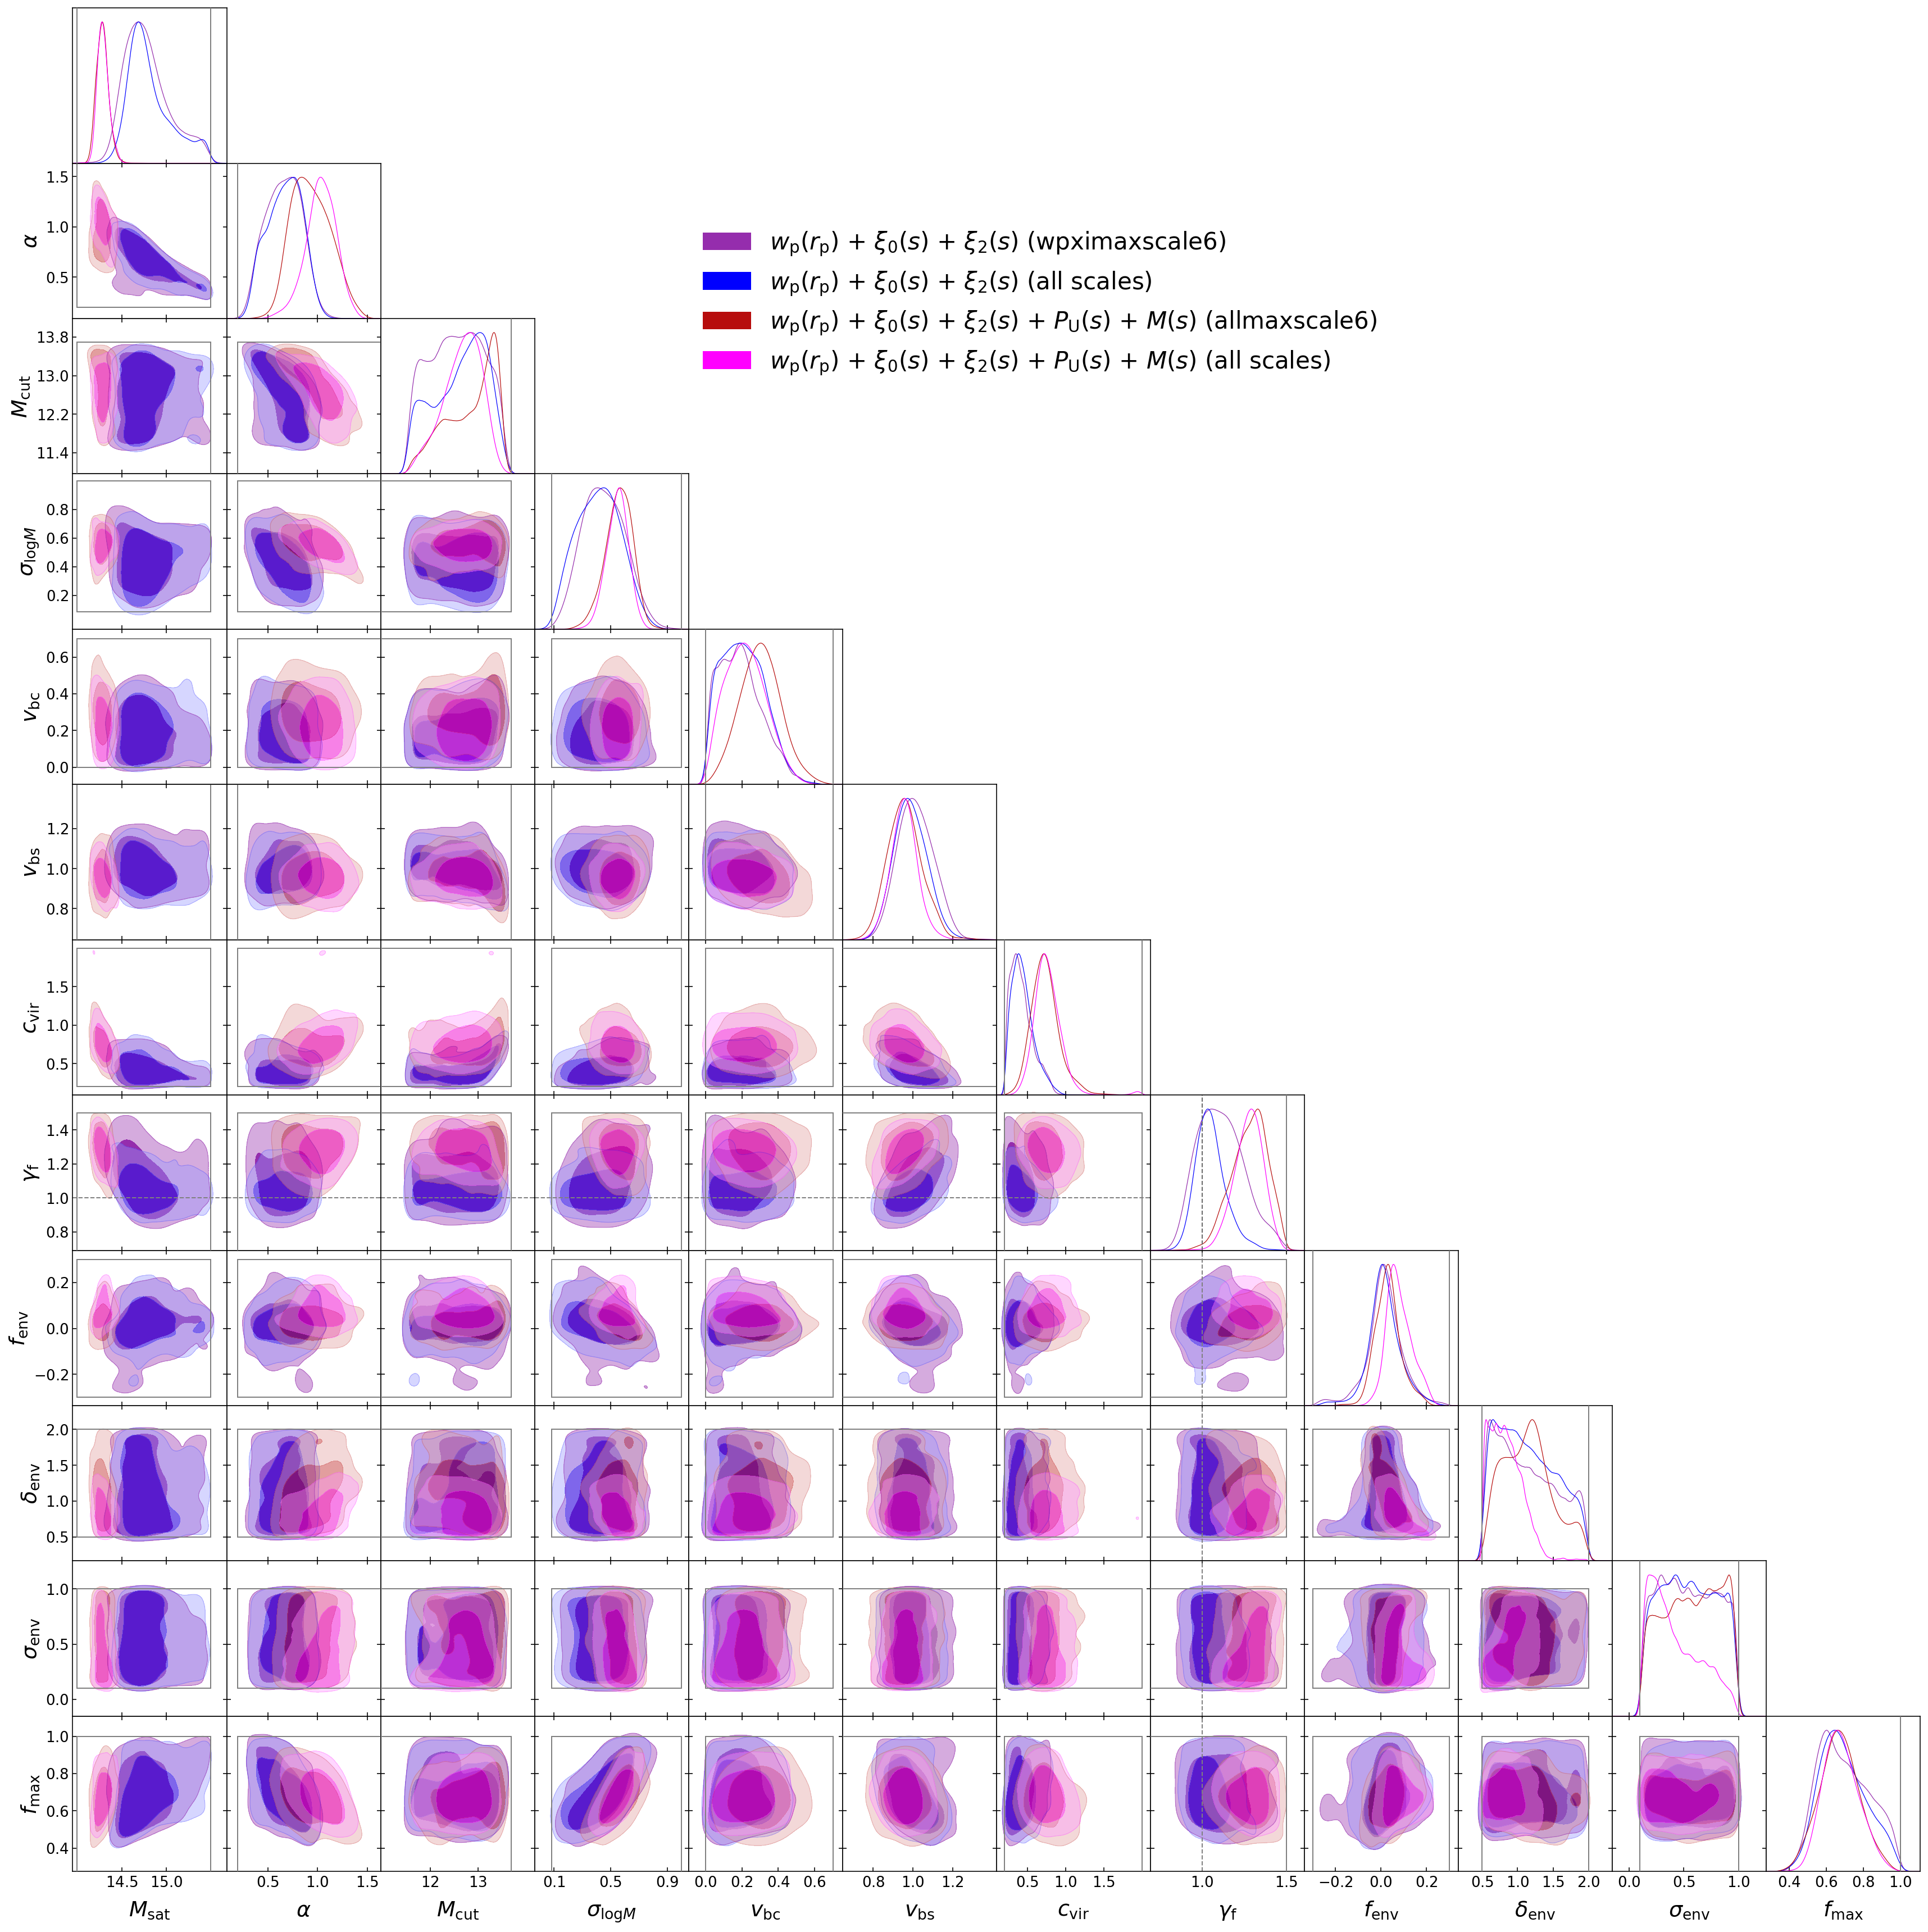

In [28]:
%matplotlib inline
chaintags = [
             'wp_xi_xi2_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_wpximaxscale6',
             'wp_xi_xi2_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth',
             'wp_xi_xi2_upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_allmaxscale6',
             #'wp_xi_xi2_upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_wpximaxscale6',
             'wp_xi_xi2_upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth',
            ]
#colors = [colors_addin[2]]
#labels = [labels_addin_full[2]]
colors = [colors_addin[2],
          'blue',
          colors_addin[4], 
          'magenta',
          ]
labels = [labels_addin_full[2]+' (wpximaxscale6)',
          labels_addin_full[2]+' (all scales)',
          labels_addin_full[4]+' (allmaxscale6)',
          labels_addin_full[4]+' (all scales)',        
         ]
g = plotter.plot_contours(chaintags, colors=colors,
                          legend_labels=labels, legend_loc=(0.36, 0.8),
                          legend_fontsize=24,
                          params_toplot=hod_param_names,
                          plot_hard_prior=True)

below: a hot mess! these took forever to finish, and clearly did not converge

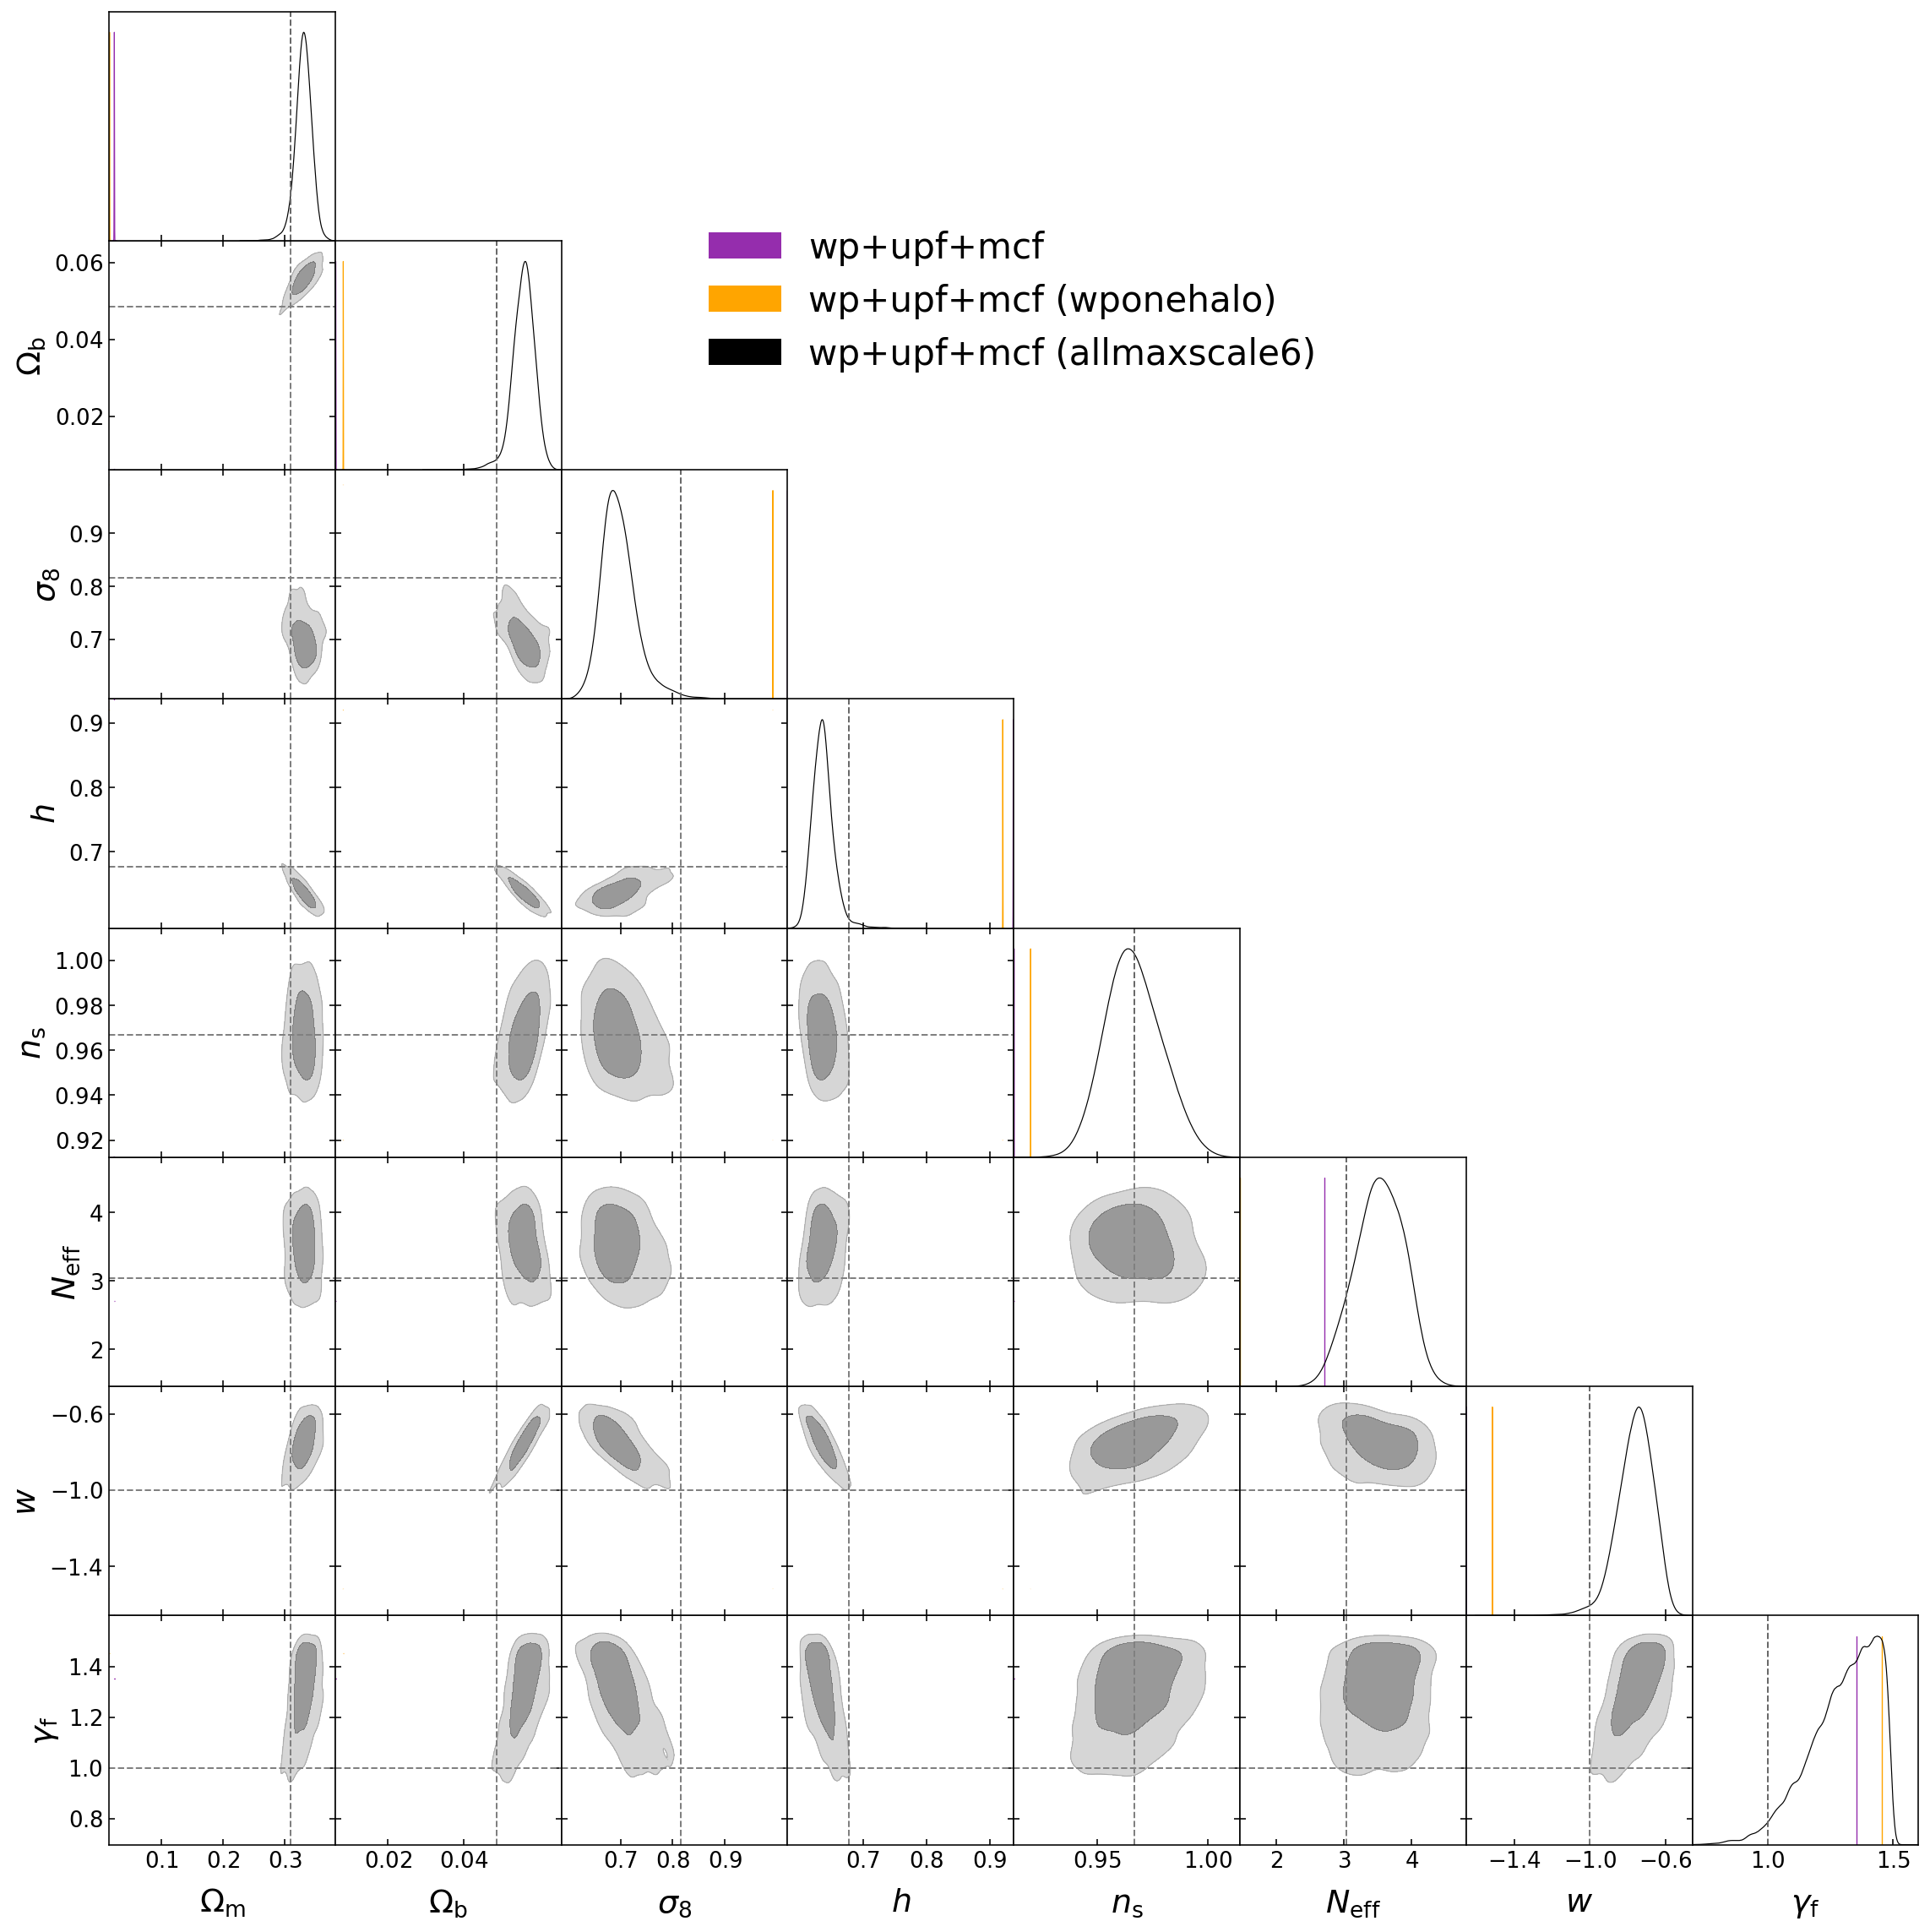

In [14]:
%matplotlib inline
chaintags = [
             'wp_upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth',
             'wp_upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_wponehalo',
             'wp_upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_allmaxscale6',
            ]
#colors = [colors_addin[2]]
#labels = [labels_addin_full[2]]
colors = [colors_addin[2], 'orange', 'black']
extra_label = ''
labels = ['wp+upf+mcf',
          'wp+upf+mcf (wponehalo)',
          'wp+upf+mcf (allmaxscale6)',
         ]
g = plotter.plot_contours(chaintags, colors=colors,
                          legend_labels=labels, legend_loc=(0.36, 0.8),
                          legend_fontsize=24,
                          params_toplot=cosmo_withf_param_names)

## investigate best fits

In [5]:
mock_name_test = '_aemulus_fmaxmocks_test'

In [6]:
statistics = ['wp', 'xi', 'xi2', 'upf', 'mcf']
train_tag_extra = '_errstdev_fmaxmocks_uchuuchi2nclosest2000'
train_tags_extra = [train_tag_extra]*len(statistics)
emu_name = 'George'
emu_names = [emu_name]*len(statistics)
scalings = [utils.get_fiducial_emu_scaling(statistic) for statistic in statistics]
id_tag = '_aemulus_fmaxmocks_uchuuchi2nclosest2000'

In [7]:
chaintag = 'wp_xi_xi2_upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_wpximaxscale6'
#chaintag = 'wp_xi_xi2_upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth'
chain_params_fn = f'../chains/param_files/chain_params_{chaintag}.h5'
f = h5py.File(chain_params_fn, 'r+')

mock_name_test = f.attrs['mock_name_test']
mock_name_train = f.attrs['mock_name_train']
data_name = f.attrs['data_name']

statistics = f.attrs['statistics']
print(statistics)
emu_names = f.attrs['emu_names']
scalings = f.attrs['scalings']
if 'bins' in f.keys():
    bins = [list(b_arr) for b_arr in f['bins']]
else:
    bins = f.attrs['bins']
train_tags_extra = f.attrs['train_tags_extra']

# param_names_vary = f.attrs['param_names_vary']
# chain_results_fn = f.attrs['chain_results_fn']


['wp' 'xi' 'xi2' 'upf' 'mcf']


In [8]:
# rebuild emus
#emus = [None]*n_stats
emu_dict = {}
for i, statistic in enumerate(statistics):
    Emu = utils.get_emu(emu_names[i])

    train_tag = f'_{emu_names[i]}_{scalings[i]}{train_tags_extra[i]}'
    models_dir = '/mount/sirocco1/ksf293/aemulator/models'
    model_fn = f'{models_dir}/model_{statistic}{train_tag}' #emu will add proper file ending
    scaler_x_fn = f'{models_dir}/scaler_x_{statistic}{train_tag}.joblib'
    scaler_y_fn = f'{models_dir}/scaler_y_{statistic}{train_tag}.joblib'
    err_fn = f"../covariances/stdev_{mock_name_test}_{statistic}_hod3_test0.dat"
    #err_fn = f"../../clust/covariances/error_aemulus_{statistic}_hod3_test0.dat"

    id_tag = ''
    if 'fmaxmocks_uchuuchi2nclosest2000' in train_tags_extra[i]:
        id_tag = '_aemulus_fmaxmocks_uchuuchi2nclosest2000'
                
    emu = Emu(statistic, scalings[i], model_fn, scaler_x_fn, scaler_y_fn, err_fn, 
              #bins=bins[i], 
              predict_mode=True, mock_name_train=mock_name_train,
              id_tag=id_tag)
    emu.load_model()
    emu_dict[statistic] = emu
    print(f"Emulator for {statistic} built with train_tag {train_tag}")

aemulus_fmaxmocks_train _aemulus_fmaxmocks_uchuuchi2nclosest2000
original number of training ID pairs: 2000
(load_id_pairs_train) N_train: 2000
(emulator.py set_training_data) N_train: 2000


/home/users/ksf293/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/users/ksf293/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator FunctionTransformer from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Emulator for wp built with train_tag _George_log_errstdev_fmaxmocks_uchuuchi2nclosest2000
aemulus_fmaxmocks_train _aemulus_fmaxmocks_uchuuchi2nclosest2000
original number of training ID pairs: 2000
(load_id_pairs_train) N_train: 2000
(emulator.py set_training_data) N_train: 2000


/home/users/ksf293/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/users/ksf293/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator FunctionTransformer from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Emulator for xi built with train_tag _George_log_errstdev_fmaxmocks_uchuuchi2nclosest2000
aemulus_fmaxmocks_train _aemulus_fmaxmocks_uchuuchi2nclosest2000
original number of training ID pairs: 2000
(load_id_pairs_train) N_train: 2000
(emulator.py set_training_data) N_train: 2000


/home/users/ksf293/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/users/ksf293/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator FunctionTransformer from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Emulator for xi2 built with train_tag _George_xrsqmean_errstdev_fmaxmocks_uchuuchi2nclosest2000
aemulus_fmaxmocks_train _aemulus_fmaxmocks_uchuuchi2nclosest2000
original number of training ID pairs: 2000
(load_id_pairs_train) N_train: 2000
(emulator.py set_training_data) N_train: 2000


/home/users/ksf293/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/users/ksf293/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator FunctionTransformer from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Emulator for upf built with train_tag _George_log_errstdev_fmaxmocks_uchuuchi2nclosest2000
aemulus_fmaxmocks_train _aemulus_fmaxmocks_uchuuchi2nclosest2000
original number of training ID pairs: 2000
(load_id_pairs_train) N_train: 2000
(emulator.py set_training_data) N_train: 2000


/home/users/ksf293/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
/home/users/ksf293/miniconda3/lib/python3.7/site-packages/sklearn/base.py:334: UserWarning: Trying to unpickle estimator FunctionTransformer from version 0.24.2 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


Emulator for mcf built with train_tag _George_log_errstdev_fmaxmocks_uchuuchi2nclosest2000


In [9]:
def get_best_fit(chaintag):
    
    # Load info
    chain_params_fn = f'../chains/param_files/chain_params_{chaintag}.h5'
    f = h5py.File(chain_params_fn, 'r+')

    data_name = f.attrs['data_name']
    mock_name_test = f.attrs['mock_name_test']

    statistics = f.attrs['statistics']
    print(statistics)
    emu_names = f.attrs['emu_names']
    scalings = f.attrs['scalings']

    param_names_vary = f.attrs['param_names_vary']
    chain_results_fn = f.attrs['chain_results_fn']

    if 'bins' in f.keys():
        bins = [list(b_arr) for b_arr in f['bins']]
    else:
        bins = f.attrs['bins']
    
    truths = f.attrs['true_values']

    f.close()
    
    data_tag = '_'+data_name
    n_stats = len(statistics)
    
    # get best-fit parameters
    chain_results_fn = f'/export/sirocco1/ksf293/aemulator/chains/results/results_{chaintag}.pkl'
    with open(chain_results_fn, 'rb') as pf:
        res = pickle.load(pf)
        samples, weights = res.samples, np.exp(res.logwt - res.logz[-1])
        logl = res.logl
        samples_equal = dyfunc.resample_equal(samples, weights)
        params_lowlogl = get_lowest_likelihood(samples, logl)
        
    # use emu to get statistics of best-fit parameters
    n_bins = 9
    emulated_lowlogl_arr = []
    #emulated_lowlogl_arr = np.empty((n_stats, n_bins))
    #emulated_true_arr = np.empty((n_stats, n_bins))
    for i, statistic in enumerate(statistics):
        #emulated_lowlogl_arr[i,:] = emu_dict[statistic].predict(params_lowlogl)
        emulated_lowlogl = emu_dict[statistic].predict(params_lowlogl)
        emulated_lowlogl_arr.append(emulated_lowlogl)
        #emulated_true_arr[i,:] = emus[i].predict(truths)
        
    return statistics, emulated_lowlogl_arr, bins, mock_name_test

In [10]:
def get_observed(statistics, data_tag, bins):
    # get observed values
    n_stats = len(statistics)
    n_bins = 9
    #ys_observed = np.empty((n_stats, n_bins))
    ys_observed = []
    for i, statistic in enumerate(statistics):
        result_dir=f"/home/users/ksf293/clust/results{data_tag}/results_{statistic}"
        fn_stat=f"{result_dir}/{statistic}{data_tag}.dat"

        _, y_obs = np.loadtxt(fn_stat, delimiter=',', unpack=True)
        #ys_observed.append(y_obs[bins[i]])
        ys_observed.append(y_obs)
        #ys_observed[i,:] = y_obs
    return ys_observed

In [11]:
def plot_best_fit_figure(statistics, ys_observed, emulated_lowlogl_arr, bins, mock_name_test):
    
    fig = plt.figure(figsize=(15, 10))

    outer = gridspec.GridSpec(2, 3, wspace=0.4, hspace=0.25)

    for i, statistic in enumerate(statistics):
        inner = gridspec.GridSpecFromSubplotSpec(2, 1, hspace=0,
                        subplot_spec=outer[i],
                        height_ratios=[2, 1])

        ax0 = plt.Subplot(fig, inner[0])
        ax1 = plt.Subplot(fig, inner[1])
        
        m, m_all = 1, 1
        ylabel = stat_labels[statistic]
        if statistic == 'xi2':
            m_all = r_dict[statistic]**2
            m = m_all[bins[i]]
            ylabel = r'$s^2$' + ylabel

        rs = r_dict[statistic][bins[i]]
        rs_all = r_dict[statistic]
        # main plot

        #print(len(rs), len(m*ys_observed[i][bins[i]]))
        ax0.plot(rs, m*ys_observed[i][bins[i]], marker='.', ls='None', color='k', markersize=10, label='Mock')
        ax0.plot(rs_all, m_all*ys_observed[i], marker='.', ls='None', color='k', 
                 markerfacecolor='None', markersize=10, label='Mock (not used in fit)')
        ax0.plot(rs_all, m_all*emulated_lowlogl_arr[i], ls='-', color='darkviolet', label='Emulator, MCMC best fit')
        #ax0.plot(r_dict[statistic], m*emulated_true_arr[i], ls='--', color='black', label='Emulator, true params')

        # residual plot 
        err_lowlogl = (emulated_lowlogl_arr[i] - ys_observed[i])/ys_observed[i]
        ax1.plot(rs_all, err_lowlogl, ls='-', color='darkviolet')
        #err_true = (emulated_true_arr[i] - ys_observed[i])/ys_observed[i]
        #ax1.plot(r_dict[statistic], err_true, ls='--', color='black')
        ax1.axhline(0.0, color='k')
    
        mock_tag_test = '_'+mock_name_test
        err_fn = f"../covariances/stdev{mock_tag_test}_{statistic}_hod3_test0.dat"
        sample_std = np.loadtxt(err_fn)
        sample_var = np.loadtxt(err_fn)
        ax1.fill_between(r_dict[statistic], -sample_std, sample_std, color='lightblue', alpha=0.7)
        ax1.fill_between(r_dict[statistic], -sample_std/np.sqrt(5), sample_std/np.sqrt(5), color='steelblue', alpha=0.7)        

        # logistics
        ax0.set_xscale(scale_dict[statistic][0])
        ax0.set_yscale(scale_dict[statistic][1])

        ax0.set_ylabel(ylabel)

        ax1.set_xscale(scale_dict[statistic][0])
        ax1.set_xlabel(r_labels[statistic])
        ax1.set_ylabel('frac. error')
        
        fig.add_subplot(ax0)
        fig.add_subplot(ax1)
        
    handles, labels = ax0.get_legend_handles_labels()
    sample_var_patch = mpatches.Patch(color='lightblue', alpha=0.5, label='Sample variance')
    sample_var_sqrt_patch = mpatches.Patch(color='steelblue', alpha=0.7, label=r'Sample variance / $\sqrt{N_\mathrm{boxes}}$')
    handles.append(sample_var_patch) 
    handles.append(sample_var_sqrt_patch)
    plt.legend(handles=handles, fontsize=14, loc=(1.3, 0.6))

In [12]:
def get_lowest_likelihood(samples, logl):
    print(np.max(logl))
    params_lowlogl = samples[np.argmax(logl)] #max because logl's are negative
    return params_lowlogl

In [14]:
def print_rchi2(chaintag):
    chain_fn = f'../chains/param_files/chain_params_{chaintag}.h5'
    f = h5py.File(chain_fn, 'r')
    cov_fn = f.attrs['cov_fn']
    cov = np.loadtxt(cov_fn)
    variances = np.diag(cov)

    #variances from cov are fractional!
    rs, ys_true, ys_pred_best = utils.get_best_fit(chaintag, emu_dict)
    ys_true_flat = np.array( ys_true).flatten()
    ys_pred_flat = np.array(ys_pred_best).flatten()
    variances_nonfrac = variances*(ys_true_flat**2)

    deg_freedom = utils.get_deg_of_freedom(chaintag) 
    rchi2 = utils.reduced_chi2(ys_true_flat, ys_pred_flat, variances_nonfrac, deg_freedom)
    print("Reduced chi2:", rchi2)

['Omega_m' 'Omega_b' 'sigma_8' 'h' 'n_s' 'N_eff' 'w' 'M_sat' 'alpha'
 'M_cut' 'sigma_logM' 'v_bc' 'v_bs' 'c_vir' 'f' 'f_env' 'delta_env'
 'sigma_env' 'f_max']
[ 0.31129921  0.05027468  0.77698748  0.67014792  0.96545841  3.40366625
 -0.92919069 14.74786162  0.66445082 12.56083662  0.44498868  0.18224107
  1.00963812  0.3971487   1.09966753  0.01646025  1.07737767  0.53731358
  0.68173394]
<HDF5 dataset "bins": shape (3,), type "|O">
n_obs: 23
m_params: 19
Chi2: 44.422998393720796
Reduced chi2: 11.105749598430199
['wp' 'xi' 'xi2']
-0.5677816197467125


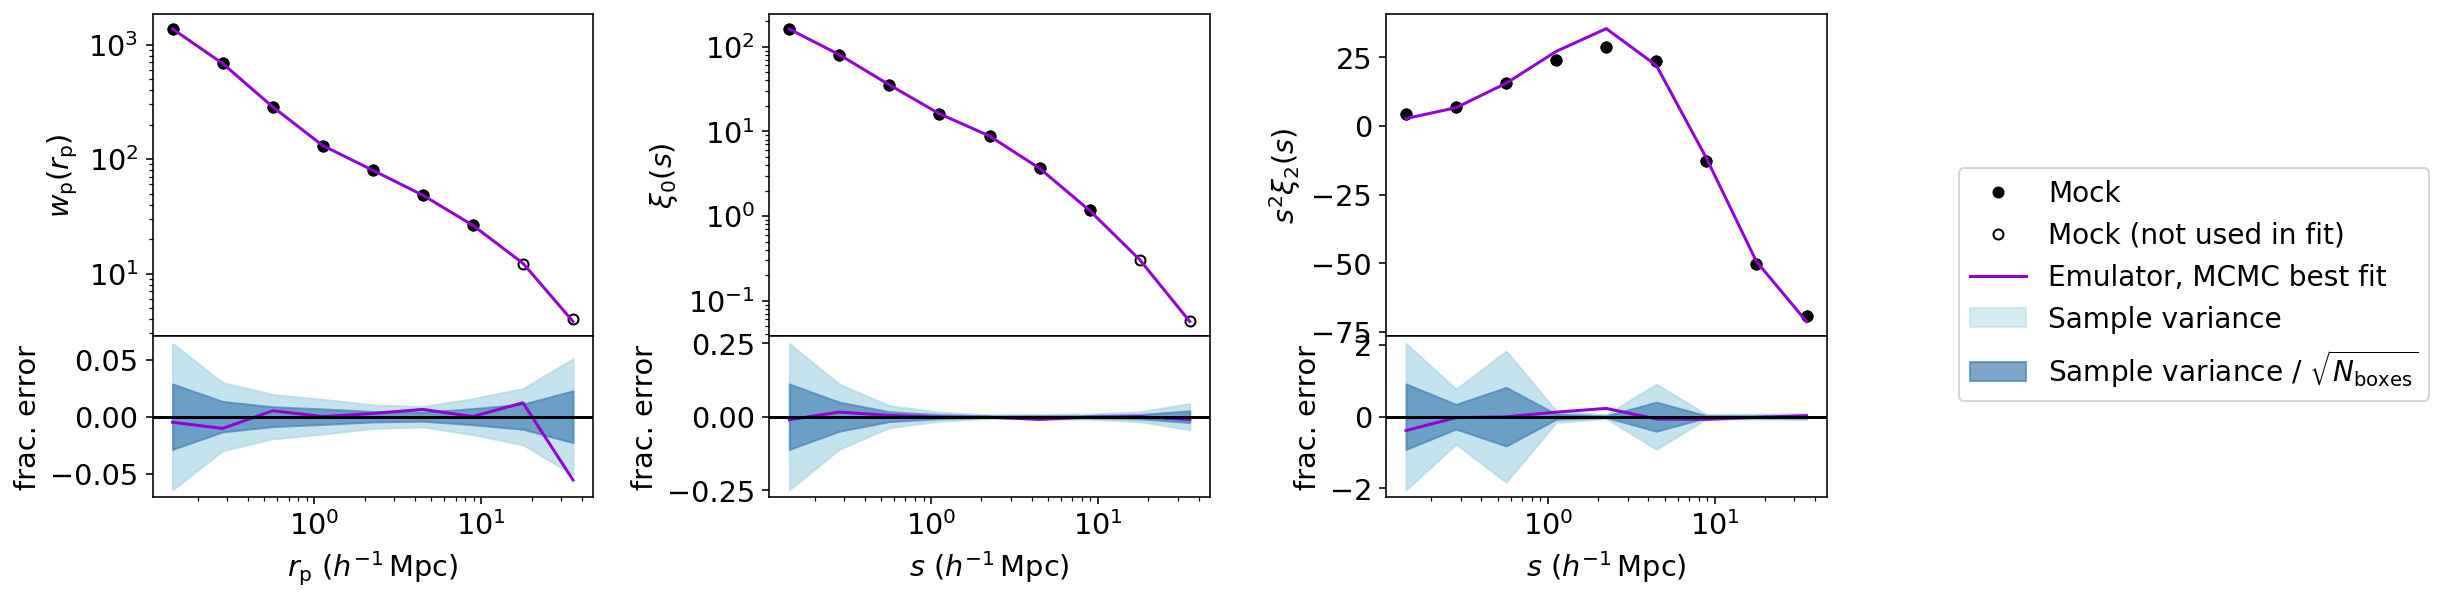

In [15]:
data_tag = '_uchuu'
chaintag = 'wp_xi_xi2_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_wpximaxscale6'
print_rchi2(chaintag)
statistics, emulated_lowlogl_arr, bins, mock_name_test = get_best_fit(chaintag)
ys_observed = get_observed(statistics, data_tag, bins)
plot_best_fit_figure(statistics, ys_observed, emulated_lowlogl_arr, bins, mock_name_test)

['wp' 'xi' 'xi2' 'upf' 'mcf']
-7.439313317210699
['Omega_m' 'Omega_b' 'sigma_8' 'h' 'n_s' 'N_eff' 'w' 'M_sat' 'alpha'
 'M_cut' 'sigma_logM' 'v_bc' 'v_bs' 'c_vir' 'f' 'f_env' 'delta_env'
 'sigma_env' 'f_max']
[ 0.32751605  0.05525076  0.69798686  0.63984007  0.97070604  3.56058455
 -0.76551111 14.28197813  0.921964   12.98230186  0.56238192  0.30070643
  0.95734973  0.72099545  1.2906798   0.02912466  1.1399273   0.58373534
  0.66865523]
<HDF5 dataset "bins": shape (5,), type "|O">
n_obs: 35
Chi2: 28.236598978562682
Reduced chi2: 1.7647874361601676


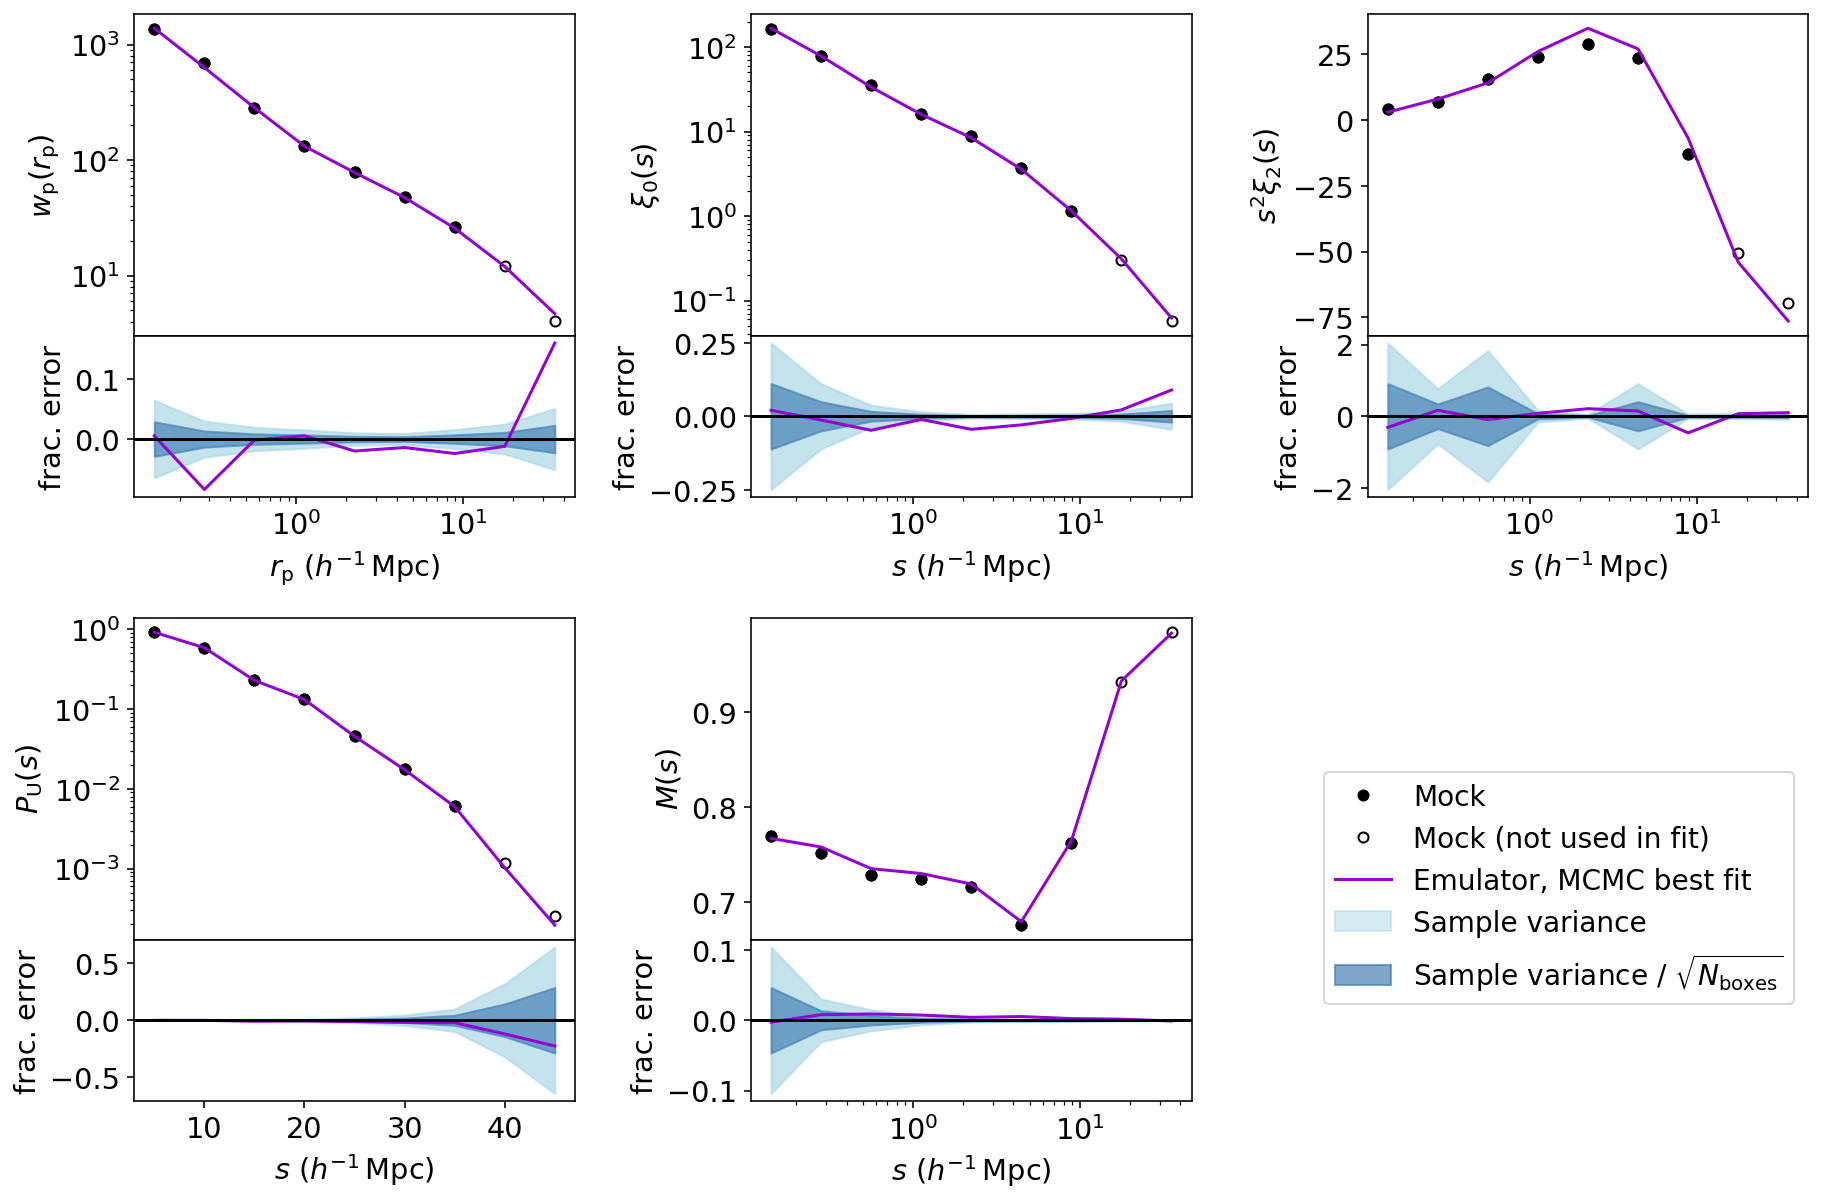

In [121]:
data_tag = '_uchuu'
chaintag = 'wp_xi_xi2_upf_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_allmaxscale6'
statistics, emulated_lowlogl_arr, bins, mock_name_test = get_best_fit(chaintag)
ys_observed = get_observed(statistics, data_tag, bins)
plot_best_fit_figure(statistics, ys_observed, emulated_lowlogl_arr, bins, mock_name_test)
print_rchi2(chaintag)

['wp' 'upf']
-0.7026975613915316
['Omega_m' 'Omega_b' 'sigma_8' 'h' 'n_s' 'N_eff' 'w' 'M_sat' 'alpha'
 'M_cut' 'sigma_logM' 'v_bc' 'v_bs' 'c_vir' 'f' 'f_env' 'delta_env'
 'sigma_env' 'f_max']
[ 0.31374864  0.05110475  0.77577031  0.66319321  0.96430295  3.42358766
 -0.90452649 14.72279529  0.68446517 12.53056917  0.44328815  0.42482715
  1.32354336  0.42764116  0.75543538 -0.02272279  0.98745727  0.54924416
  0.64576891]
<HDF5 dataset "bins": shape (2,), type "|O">
n_obs: 14
m_params: 19
Chi2: 52.95630672747753
Reduced chi2: -10.591261345495507


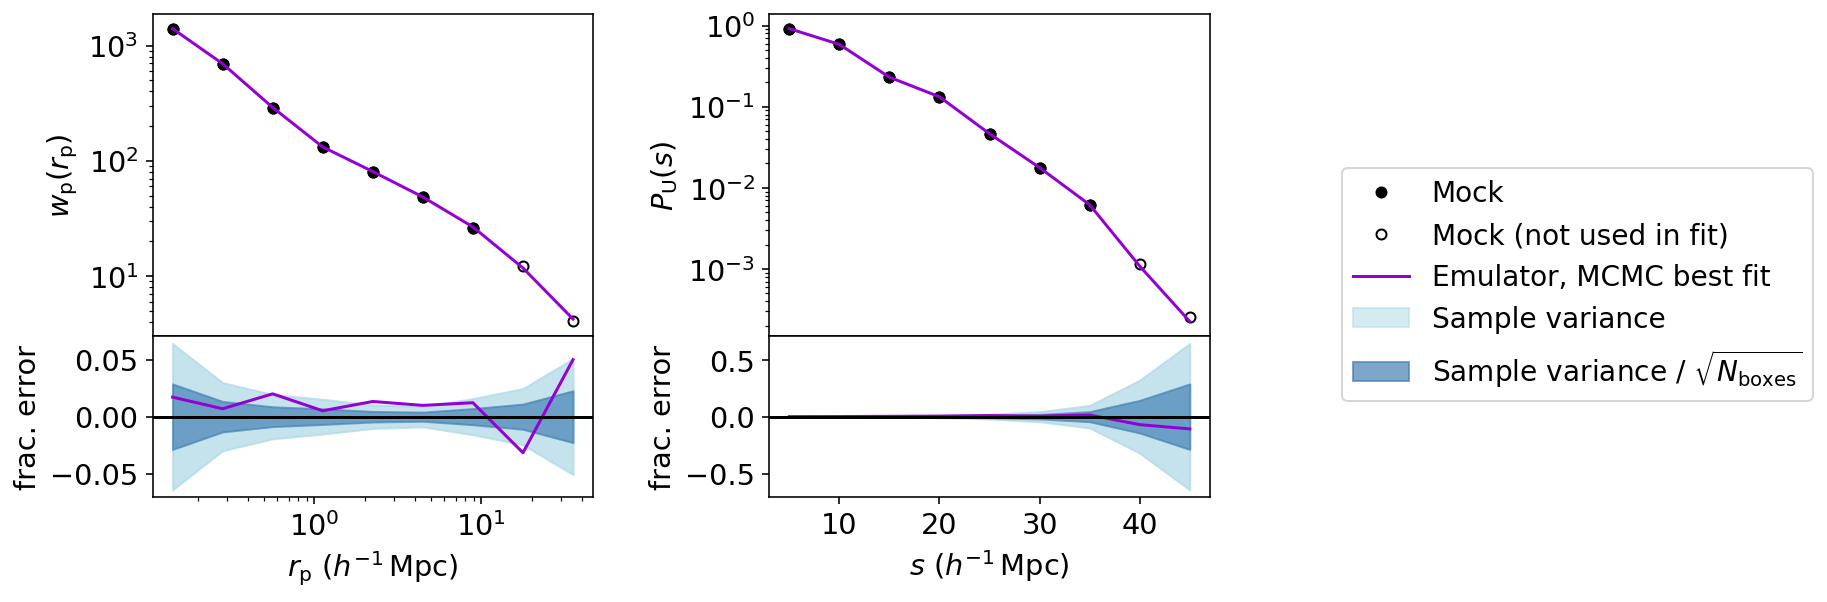

In [123]:
data_tag = '_uchuu'
chaintag = 'wp_upf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_allmaxscale6'
statistics, emulated_lowlogl_arr, bins, mock_name_test = get_best_fit(chaintag)
ys_observed = get_observed(statistics, data_tag, bins)
plot_best_fit_figure(statistics, ys_observed, emulated_lowlogl_arr, bins, mock_name_test)
print_rchi2(chaintag)

['wp' 'mcf']
-1.4711993794861808
[[0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 4, 5, 6]]


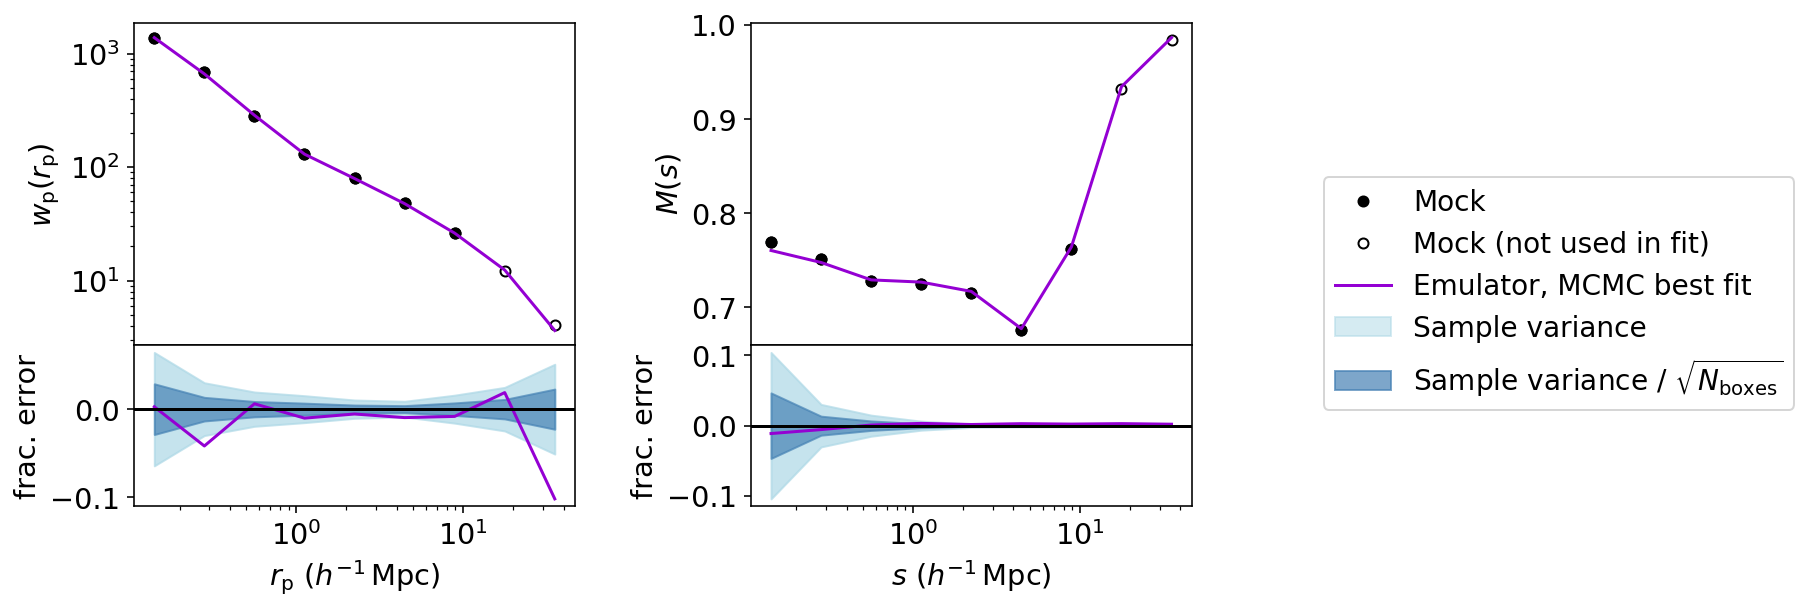

In [76]:
data_tag = '_uchuu'
chaintag = 'wp_mcf_uchuu_aemulus_fmaxmocks_uchuuchi2nclosest2000_smoothboth_allmaxscale6'
statistics, emulated_lowlogl_arr, bins, mock_name_test = get_best_fit(chaintag)
print(bins)
ys_observed = get_observed(statistics, data_tag, bins)
plot_best_fit_figure(statistics, ys_observed, emulated_lowlogl_arr, bins, mock_name_test)